## Data Pre-Processing
- In the data preprocessing stage, the raw ETF and macroeconomic datasets undergo systematic cleaning and transformation to ensure quality and consistency for model training. This involves handling missing values, removing irrelevant or redundant columns, and correcting data types such as converting date fields to datetime format. Categorical variables are encoded appropriately (e.g., one-hot encoding) to convert them into numerical formats usable by machine learning algorithms. Additionally, the datasets are aligned temporally—quarterly macroeconomic data is forward-filled to match the higher-frequency ETF data, enabling coherent integration. Feature scaling and normalization are applied to standardize the range of variables, which is crucial for stable and efficient training of deep learning models. 

### Importing Libraries

In [3]:
# Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')


#### Loading both the ETF dataset and the Macro datasets from FRED

In [4]:
#ETFs data
etf = '/Users/imperator/Documents/STUDIES/UNIVERSITY OF GHANA/RESEARCH WORK/CORCHIL KELLY KWAME/PORTFOLIO OPTIMIZATION/PROJECT CODE/Dimensionality-Reduction-PortfolioOptimization/EDA/ETFs_datasets/Final_csv/2-indicators_x_etfs.csv'
etf_df = pd.read_csv(etf)
print("Complete ETF Data Shape:", etf_df.shape)

# Load macroeconomic data
macro = "/Users/imperator/Documents/STUDIES/UNIVERSITY OF GHANA/RESEARCH WORK/CORCHIL KELLY KWAME/PORTFOLIO OPTIMIZATION/PROJECT CODE/Dimensionality-Reduction-PortfolioOptimization/EDA/ETFs_datasets/Final_csv/3-macro_data.csv"
macro_df = pd.read_csv(macro) 
print("Original Macro Data Shape:", macro_df.shape)

# Reason: Separate loading allows independent preprocessing before merging


Complete ETF Data Shape: (20120, 23)
Original Macro Data Shape: (121, 21)


In [5]:

# Clean and prepare both DataFrames
for df in [etf_df, macro_df]:
    # Strip whitespace from column names
    df.columns = df.columns.str.strip()
    # Strip whitespace from all string/object columns
    for col in df.select_dtypes(include='object').columns:
        df[col] = df[col].str.strip()
    # Force 'Date' column to datetime
    df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
    # Sort by date and reset index
    df.sort_values('Date', inplace=True)
    df.reset_index(drop=True, inplace=True)

# Set 'Date' as index and ensure it's a DatetimeIndex
for df in [etf_df, macro_df]:
    df.set_index('Date', inplace=True)
    if not isinstance(df.index, pd.DatetimeIndex):
        df.index = pd.to_datetime(df.index, errors='coerce')

# Example: print the first few rows to verify
print("ETF DataFrame:")
print(etf_df.head())
print("\nMacro DataFrame:")
print(macro_df.head())

ETF DataFrame:
           Ticker   Close    High     Low    Open    Volume  returns  EMA_10  \
Date                                                                           
2015-06-15    AGG   83.57   83.76   83.51   83.76   1666600      0.0  77.775   
2015-06-15    GLD  113.73  114.15  113.21  113.28   5055100      0.0  77.775   
2015-06-15    HYG   52.68   52.91   52.66   52.82  12726200      0.0  77.775   
2015-06-15   VXUS   38.22   38.22   38.01   38.07    352700      0.0  77.775   
2015-06-15    USO  161.20  161.60  159.52  159.60   1256463      0.0  77.775   

            EMA_50  MACD  ...  ATR_14  Volatility_21       OBV  \
Date                      ...                                    
2015-06-15   77.42  0.17  ...     0.0           0.14   1666600   
2015-06-15   77.42  0.17  ...     0.0           0.14   5055100   
2015-06-15   77.42  0.17  ...     0.0           0.14  12726200   
2015-06-15   77.42  0.17  ...     0.0           0.14    352700   
2015-06-15   77.42  0.17  ..

In [6]:
print(macro_df)
df.columns

               cpi  core_cpi  pce_price_index  real_gdp  \
Date                                                      
2015-01-05  237.00    241.69            97.33  18782.24   
2015-01-06  237.66    242.06            97.52  18782.24   
2015-01-07  238.03    242.56            97.60  18857.42   
2015-01-08  238.03    242.82            97.61  18857.42   
2015-01-09  237.50    243.32            97.48  18857.42   
...            ...       ...              ...       ...   
2025-01-01  319.09    324.74           125.22  23528.05   
2025-01-02  319.77    325.48           125.74  23528.05   
2025-01-03  319.62    325.66           125.75  23528.05   
2025-01-04  320.32    326.43           125.88  23528.05   
2025-01-05  320.58    326.85           125.88  23528.05   

            industrial_production  durable_goods_orders  unemployment_rate  \
Date                                                                         
2015-01-05                 100.77                218316                5.6  

Index(['cpi', 'core_cpi', 'pce_price_index', 'real_gdp',
       'industrial_production', 'durable_goods_orders', 'unemployment_rate',
       'nonfarm_payrolls', 'jobless_claims', 'fed_funds_rate', 'treasury_10y',
       'treasury_3m', 'baa_yield', 'aaa_yield', 'consumer_credit',
       'mortgage_rate_30y', 'housing_starts', 'building_permits',
       'new_home_sales', 'umich_consumer_sentiment'],
      dtype='object')

In [7]:
macro_cols = ['cpi', 'core_cpi', 'pce_price_index', 'real_gdp',
       'industrial_production', 'durable_goods_orders', 'unemployment_rate',
       'nonfarm_payrolls', 'jobless_claims', 'fed_funds_rate', 'treasury_10y',
       'treasury_3m', 'baa_yield', 'aaa_yield', 'consumer_credit',
       'mortgage_rate_30y', 'housing_starts', 'building_permits',
       'new_home_sales', 'umich_consumer_sentiment']

df[macro_cols] = df[macro_cols].fillna(method='ffill')


In [8]:
macro_df.isnull().sum()

cpi                         0
core_cpi                    0
pce_price_index             0
real_gdp                    0
industrial_production       0
durable_goods_orders        0
unemployment_rate           0
nonfarm_payrolls            0
jobless_claims              0
fed_funds_rate              0
treasury_10y                0
treasury_3m                 0
baa_yield                   0
aaa_yield                   0
consumer_credit             0
mortgage_rate_30y           0
housing_starts              0
building_permits            0
new_home_sales              0
umich_consumer_sentiment    0
dtype: int64

In [9]:
df['jobless_claims'] = df['jobless_claims'].fillna(df['jobless_claims'].median())
df['baa_yield'] = df['baa_yield'].fillna(df['baa_yield'].median())
df['aaa_yield'] = df['aaa_yield'].fillna(df['aaa_yield'].median())
df['mortgage_rate_30y'] = df['mortgage_rate_30y'].fillna(df['mortgage_rate_30y'].median())
macro_df.isnull().sum()


cpi                         0
core_cpi                    0
pce_price_index             0
real_gdp                    0
industrial_production       0
durable_goods_orders        0
unemployment_rate           0
nonfarm_payrolls            0
jobless_claims              0
fed_funds_rate              0
treasury_10y                0
treasury_3m                 0
baa_yield                   0
aaa_yield                   0
consumer_credit             0
mortgage_rate_30y           0
housing_starts              0
building_permits            0
new_home_sales              0
umich_consumer_sentiment    0
dtype: int64

- I used the median to fill in the missing values for the macros data

In [10]:
# round up all the numeric columns to 2 decimal places
macro_df = macro_df.round(2)

In [11]:
macro_df.to_csv('/Users/imperator/Documents/STUDIES/UNIVERSITY OF GHANA/RESEARCH WORK/CORCHIL KELLY KWAME/PORTFOLIO OPTIMIZATION/PROJECT CODE/Dimensionality-Reduction-PortfolioOptimization/EDA/ETFs_datasets/Final_csv/3-macro_data.csv', index=True)

In [12]:
etf_df.isnull().sum()

Ticker             0
Close              0
High               0
Low                0
Open               0
Volume             0
returns            0
EMA_10             0
EMA_50             0
MACD               0
MACD_Signal        0
RSI_14             0
ATR_14             0
Volatility_21      0
OBV                0
Max_Drawdown_21    0
Calmar_Ratio_21    0
Beta               0
Alpha              0
ADX_14             0
DMI_plus_14        0
DMI_minus_14       0
dtype: int64

##### Missing Value Handling (ETF TECHNICAL DATA)

In [13]:
# HANDINLING THE TECHNICAL DATA IN BATCHES

def clean_technical_features(etf_df):
    # === 1. Forward-fill safe columns ===
    safe_ffill_cols = ['returns', 'Cumulative_Return']
    for col in safe_ffill_cols:
        if col in df.columns:
            df[col] = df.groupby('Ticker')[col].transform(lambda x: x.ffill())

    # === 2. Drop early rows with rolling window gaps ===
    short_window_cols = [
        'EMA_10', 'EMA_50', 'MACD', 'MACD_Signal', 'RSI_14',
        'Volatility_21', 'Max_Drawdown_21', 'Calmar_Ratio_21', 'Beta', 'Alpha'
    ]
    
    long_window_cols = [
        'EMA_200', 'Avg_Daily_Volume', 'CAGR', 'Skewness',
        'Kurtosis', 'Up_Capture_Ratio'
    ]

    critical_cols = short_window_cols + long_window_cols
    critical_cols = [col for col in critical_cols if col in df.columns]

    etf_df = etf_df.groupby('Ticker').apply(lambda g: g.dropna(subset=critical_cols)).reset_index(drop=True)

    # === 3. OPTIONAL: drop long-horizon columns if data is too sparse ===
    # drop_cols = ['CAGR', 'Skewness', 'Kurtosis', 'Up_Capture_Ratio']
    # df = df.drop(columns=[col for col in drop_cols if col in df.columns])

    return etf_df
etf_df.head()

,Ticker,Close,High,Low,Open,Volume,returns,EMA_10,EMA_50,MACD,...,ATR_14,Volatility_21,OBV,Max_Drawdown_21,Calmar_Ratio_21,Beta,Alpha,ADX_14,DMI_plus_14,DMI_minus_14
Date,,,,,,,,,,,,,,,,,,,,,
2015-06-15,AGG,83.57,83.76,83.51,83.76,1666600,0.0,77.775,77.42,0.17,...,0.0,0.14,1666600,-0.1,0.0,0.89,0.0,0.0,0.0,0.0
2015-06-15,GLD,113.73,114.15,113.21,113.28,5055100,0.0,77.775,77.42,0.17,...,0.0,0.14,5055100,-0.1,0.0,0.89,0.0,0.0,0.0,0.0
2015-06-15,HYG,52.68,52.91,52.66,52.82,12726200,0.0,77.775,77.42,0.17,...,0.0,0.14,12726200,-0.1,0.0,0.89,0.0,0.0,0.0,0.0
2015-06-15,VXUS,38.22,38.22,38.01,38.07,352700,0.0,77.775,77.42,0.17,...,0.0,0.14,352700,-0.1,0.0,0.89,0.0,0.0,0.0,0.0
2015-06-15,USO,161.20,161.60,159.52,159.60,1256463,0.0,77.775,77.42,0.17,...,0.0,0.14,1256463,-0.1,0.0,0.89,0.0,0.0,0.0,0.0


In [14]:
etf_df.isnull().sum()

Ticker             0
Close              0
High               0
Low                0
Open               0
Volume             0
returns            0
EMA_10             0
EMA_50             0
MACD               0
MACD_Signal        0
RSI_14             0
ATR_14             0
Volatility_21      0
OBV                0
Max_Drawdown_21    0
Calmar_Ratio_21    0
Beta               0
Alpha              0
ADX_14             0
DMI_plus_14        0
DMI_minus_14       0
dtype: int64

In [15]:
def clean_missing_values(etf_df):
    # 1. Forward-fill safe columns
    safe_ffill_cols = ['returns', 'Cumulative_Return']
    for col in safe_ffill_cols:
        if col in etf_df.columns:
            etf_df[col] = etf_df.groupby('Ticker')[col].transform(lambda x: x.ffill())

    # 2. Define critical columns that require complete rows
    short_window_cols = [
        'EMA_10', 'EMA_50', 'MACD', 'MACD_Signal', 'RSI_14',
        'Volatility_21', 'Max_Drawdown_21', 'Calmar_Ratio_21', 'Beta', 'Alpha'
    ]
    long_window_cols = [
        'EMA_200', 'Avg_Daily_Volume', 'CAGR', 'Skewness', 'Kurtosis', 'Up_Capture_Ratio'
    ]
    critical_cols = [col for col in short_window_cols + long_window_cols if col in etf_df.columns]

    # 3. Drop all rows where any of the critical indicators are still NaN
    etf_df = etf_df.groupby('Ticker').apply(lambda g: g.dropna(subset=critical_cols)).reset_index(drop=True)

    # 4. Optional: drop 'returns' column if you're not using it
    if 'returns' in etf_df.columns:
        etf_df.drop(columns=['returns'], inplace=True)

    return etf_df


In [18]:
etf_df.head()

,Ticker,Close,High,Low,Open,Volume,returns,EMA_10,EMA_50,MACD,...,ATR_14,Volatility_21,OBV,Max_Drawdown_21,Calmar_Ratio_21,Beta,Alpha,ADX_14,DMI_plus_14,DMI_minus_14
Date,,,,,,,,,,,,,,,,,,,,,
2015-06-15,AGG,83.57,83.76,83.51,83.76,1666600,0.0,77.78,77.42,0.17,...,0.0,0.14,1666600,-0.1,0.0,0.89,0.0,0.0,0.0,0.0
2015-06-15,GLD,113.73,114.15,113.21,113.28,5055100,0.0,77.78,77.42,0.17,...,0.0,0.14,5055100,-0.1,0.0,0.89,0.0,0.0,0.0,0.0
2015-06-15,HYG,52.68,52.91,52.66,52.82,12726200,0.0,77.78,77.42,0.17,...,0.0,0.14,12726200,-0.1,0.0,0.89,0.0,0.0,0.0,0.0
2015-06-15,VXUS,38.22,38.22,38.01,38.07,352700,0.0,77.78,77.42,0.17,...,0.0,0.14,352700,-0.1,0.0,0.89,0.0,0.0,0.0,0.0
2015-06-15,USO,161.20,161.60,159.52,159.60,1256463,0.0,77.78,77.42,0.17,...,0.0,0.14,1256463,-0.1,0.0,0.89,0.0,0.0,0.0,0.0


In [19]:
etf_df = etf_df.round(2)
etf_df.head()

,Ticker,Close,High,Low,Open,Volume,returns,EMA_10,EMA_50,MACD,...,ATR_14,Volatility_21,OBV,Max_Drawdown_21,Calmar_Ratio_21,Beta,Alpha,ADX_14,DMI_plus_14,DMI_minus_14
Date,,,,,,,,,,,,,,,,,,,,,
2015-06-15,AGG,83.57,83.76,83.51,83.76,1666600,0.0,77.78,77.42,0.17,...,0.0,0.14,1666600,-0.1,0.0,0.89,0.0,0.0,0.0,0.0
2015-06-15,GLD,113.73,114.15,113.21,113.28,5055100,0.0,77.78,77.42,0.17,...,0.0,0.14,5055100,-0.1,0.0,0.89,0.0,0.0,0.0,0.0
2015-06-15,HYG,52.68,52.91,52.66,52.82,12726200,0.0,77.78,77.42,0.17,...,0.0,0.14,12726200,-0.1,0.0,0.89,0.0,0.0,0.0,0.0
2015-06-15,VXUS,38.22,38.22,38.01,38.07,352700,0.0,77.78,77.42,0.17,...,0.0,0.14,352700,-0.1,0.0,0.89,0.0,0.0,0.0,0.0
2015-06-15,USO,161.20,161.60,159.52,159.60,1256463,0.0,77.78,77.42,0.17,...,0.0,0.14,1256463,-0.1,0.0,0.89,0.0,0.0,0.0,0.0


In [20]:
# Dropping indicators with large NAN values

columns_to_drop = [
    'EMA_200',
    'Avg_Daily_Volume',
    'CAGR',
    'Skewness',
    'Kurtosis',
    'Up_Capture_Ratio',
]

etf_df = etf_df.drop(columns=[col for col in columns_to_drop if col in etf_df.columns])
etf_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 20120 entries, 2015-06-15 to 2025-06-12
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Ticker           20120 non-null  object 
 1   Close            20120 non-null  float64
 2   High             20120 non-null  float64
 3   Low              20120 non-null  float64
 4   Open             20120 non-null  float64
 5   Volume           20120 non-null  int64  
 6   returns          20120 non-null  float64
 7   EMA_10           20120 non-null  float64
 8   EMA_50           20120 non-null  float64
 9   MACD             20120 non-null  float64
 10  MACD_Signal      20120 non-null  float64
 11  RSI_14           20120 non-null  float64
 12  ATR_14           20120 non-null  float64
 13  Volatility_21    20120 non-null  float64
 14  OBV              20120 non-null  int64  
 15  Max_Drawdown_21  20120 non-null  float64
 16  Calmar_Ratio_21  20120 non-null  float64


In [21]:
etf_df.shape

(20120, 22)

In [22]:
macro_df.head()

,cpi,core_cpi,pce_price_index,real_gdp,industrial_production,durable_goods_orders,unemployment_rate,nonfarm_payrolls,jobless_claims,fed_funds_rate,treasury_10y,treasury_3m,baa_yield,aaa_yield,consumer_credit,mortgage_rate_30y,housing_starts,building_permits,new_home_sales,umich_consumer_sentiment
Date,,,,,,,,,,,,,,,,,,,,
2015-01-05,237.00,241.69,97.33,18782.24,100.77,218316,5.6,141538,245000,0.12,2.20,0.02,2.61,1.70,3399358.91,3.94,1079,1272,502,90.7
2015-01-06,237.66,242.06,97.52,18782.24,100.46,228948,5.3,141709,245000,0.13,2.36,0.02,2.75,1.86,3425241.41,3.94,1205,1379,480,96.1
2015-01-07,238.03,242.56,97.60,18857.42,101.09,228347,5.2,141991,245000,0.13,2.32,0.03,2.83,1.83,3444136.97,3.94,1146,1140,506,93.1
2015-01-08,238.03,242.82,97.61,18857.42,100.92,222335,5.1,142125,270000,0.14,2.17,0.07,2.83,1.83,3460245.02,3.94,1130,1165,518,91.9
2015-01-09,237.50,243.32,97.48,18857.42,100.63,217744,5.0,142275,270000,0.14,2.17,0.02,3.18,1.98,3487878.35,3.94,1224,1144,456,87.2


In [23]:
# 1. Ensure 'Date' is the index or a datetime column in both DataFrames
etf_df.index = pd.to_datetime(etf_df.index)
macro_df.index = pd.to_datetime(macro_df.index)

# 2. Find the minimum date in etf_df
min_etf_date = etf_df.index.min()

# 3. Filter macro_df to only include dates >= min_etf_date
macro_df_filtered = macro_df[macro_df.index >= min_etf_date]

# 4. Merge (join) on the index (Date)
merged_df = etf_df.join(macro_df_filtered, how='left')

# If you want to reset index and have 'Date' as a column:
# merged_df = merged_df.reset_index()
merged_df.head()
merged_df.isnull().sum()

# If you want to reset index and have 'Date' as a column:
# merged_df = merged_df.reset_index()

Ticker                          0
Close                           0
High                            0
Low                             0
Open                            0
Volume                          0
returns                         0
EMA_10                          0
EMA_50                          0
MACD                            0
MACD_Signal                     0
RSI_14                          0
ATR_14                          0
Volatility_21                   0
OBV                             0
Max_Drawdown_21                 0
Calmar_Ratio_21                 0
Beta                            0
Alpha                           0
ADX_14                          0
DMI_plus_14                     0
DMI_minus_14                    0
cpi                         19536
core_cpi                    19536
pce_price_index             19536
real_gdp                    19536
industrial_production       19536
durable_goods_orders        19536
unemployment_rate           19536
nonfarm_payrol

In [24]:
def dropping_null_values(etf_df):
    short_window_cols = [
        'EMA_10', 'EMA_50', 'MACD', 'MACD_Signal', 'RSI_14',
        'Volatility_21', 'Max_Drawdown_21', 'Calmar_Ratio_21', 'Beta', 'Alpha'
    ]
    critical_cols = short_window_cols

    # 3. Drop all rows where any of the critical indicators are still NaN
    etf_df = etf_df.groupby('Ticker').apply(lambda g: g.dropna(subset=critical_cols)).reset_index(drop=True)
    etf_df = etf_df.dropna(thresh=len(etf_df.columns) - 1)

    # # 4. Optional: drop 'returns' column if you're not using it
    # if 'returns' in etf_df.columns:
    #     etf_df.drop(columns=['returns'], inplace=True)

    return etf_df

etf_df.head()

,Ticker,Close,High,Low,Open,Volume,returns,EMA_10,EMA_50,MACD,...,ATR_14,Volatility_21,OBV,Max_Drawdown_21,Calmar_Ratio_21,Beta,Alpha,ADX_14,DMI_plus_14,DMI_minus_14
Date,,,,,,,,,,,,,,,,,,,,,
2015-06-15,AGG,83.57,83.76,83.51,83.76,1666600,0.0,77.78,77.42,0.17,...,0.0,0.14,1666600,-0.1,0.0,0.89,0.0,0.0,0.0,0.0
2015-06-15,GLD,113.73,114.15,113.21,113.28,5055100,0.0,77.78,77.42,0.17,...,0.0,0.14,5055100,-0.1,0.0,0.89,0.0,0.0,0.0,0.0
2015-06-15,HYG,52.68,52.91,52.66,52.82,12726200,0.0,77.78,77.42,0.17,...,0.0,0.14,12726200,-0.1,0.0,0.89,0.0,0.0,0.0,0.0
2015-06-15,VXUS,38.22,38.22,38.01,38.07,352700,0.0,77.78,77.42,0.17,...,0.0,0.14,352700,-0.1,0.0,0.89,0.0,0.0,0.0,0.0
2015-06-15,USO,161.20,161.60,159.52,159.60,1256463,0.0,77.78,77.42,0.17,...,0.0,0.14,1256463,-0.1,0.0,0.89,0.0,0.0,0.0,0.0


In [25]:
etf_df.isnull().sum()

Ticker             0
Close              0
High               0
Low                0
Open               0
Volume             0
returns            0
EMA_10             0
EMA_50             0
MACD               0
MACD_Signal        0
RSI_14             0
ATR_14             0
Volatility_21      0
OBV                0
Max_Drawdown_21    0
Calmar_Ratio_21    0
Beta               0
Alpha              0
ADX_14             0
DMI_plus_14        0
DMI_minus_14       0
dtype: int64

In [26]:
etf_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 20120 entries, 2015-06-15 to 2025-06-12
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Ticker           20120 non-null  object 
 1   Close            20120 non-null  float64
 2   High             20120 non-null  float64
 3   Low              20120 non-null  float64
 4   Open             20120 non-null  float64
 5   Volume           20120 non-null  int64  
 6   returns          20120 non-null  float64
 7   EMA_10           20120 non-null  float64
 8   EMA_50           20120 non-null  float64
 9   MACD             20120 non-null  float64
 10  MACD_Signal      20120 non-null  float64
 11  RSI_14           20120 non-null  float64
 12  ATR_14           20120 non-null  float64
 13  Volatility_21    20120 non-null  float64
 14  OBV              20120 non-null  int64  
 15  Max_Drawdown_21  20120 non-null  float64
 16  Calmar_Ratio_21  20120 non-null  float64


In [121]:
# # Drop all rows with any missing values
# etf_df = etf_df.dropna()
# etf_df.info()
# etf_df.shape
# etf_df.columns


In [27]:
etf_df.isnull().sum()
etf_df.to_csv('/Users/imperator/Documents/STUDIES/UNIVERSITY OF GHANA/RESEARCH WORK/CORCHIL KELLY KWAME/PORTFOLIO OPTIMIZATION/PROJECT CODE/Dimensionality-Reduction-PortfolioOptimization/EDA/ETFs_datasets/Final_csv/2-indicators_x_etfs.csv')

#### Merging the Technical indicators with the Macro to get one complete sheet

In [28]:

etf_df = '/Users/imperator/Documents/STUDIES/UNIVERSITY OF GHANA/RESEARCH WORK/CORCHIL KELLY KWAME/PORTFOLIO OPTIMIZATION/PROJECT CODE/Dimensionality-Reduction-PortfolioOptimization/EDA/ETFs_datasets/Final_csv/2-indicators_x_etfs.csv'
macro_df = '/Users/imperator/Documents/STUDIES/UNIVERSITY OF GHANA/RESEARCH WORK/CORCHIL KELLY KWAME/PORTFOLIO OPTIMIZATION/PROJECT CODE/Dimensionality-Reduction-PortfolioOptimization/EDA/ETFs_datasets/Final_csv/3-macro_data.csv'

# Merge datasets on Date index (weekly ETF data with forward-filled weekly macro data)
merged_df = pd.read_csv (etf_df, macro_df)
merged_df = pd.merge(etf_df, macro_df, how='left', left_index=True, right_index=True)

# Check for remaining missing values
missing = merged_df.isnull().sum()
print("Missing Values After Processing:\n", missing[missing > 0])

# Drop any remaining missing values if minimal
# merged_df.dropna(inplace=True)

# Reason:  
# Resampling macro data to weekly frequency with forward fill aligns it with weekly ETF data,  
# ensuring each ETF weekly date has the latest available monthly macroeconomic data without gaps.

TypeError: read_csv() takes 1 positional argument but 2 were given

In [29]:
merged_df.shape

(20120, 42)

In [30]:
merged_df.columns

Index(['Ticker', 'Close', 'High', 'Low', 'Open', 'Volume', 'returns', 'EMA_10',
       'EMA_50', 'MACD', 'MACD_Signal', 'RSI_14', 'ATR_14', 'Volatility_21',
       'OBV', 'Max_Drawdown_21', 'Calmar_Ratio_21', 'Beta', 'Alpha', 'ADX_14',
       'DMI_plus_14', 'DMI_minus_14', 'cpi', 'core_cpi', 'pce_price_index',
       'real_gdp', 'industrial_production', 'durable_goods_orders',
       'unemployment_rate', 'nonfarm_payrolls', 'jobless_claims',
       'fed_funds_rate', 'treasury_10y', 'treasury_3m', 'baa_yield',
       'aaa_yield', 'consumer_credit', 'mortgage_rate_30y', 'housing_starts',
       'building_permits', 'new_home_sales', 'umich_consumer_sentiment'],
      dtype='object')

In [31]:
merged_df.isna().sum()

Ticker                          0
Close                           0
High                            0
Low                             0
Open                            0
Volume                          0
returns                         0
EMA_10                          0
EMA_50                          0
MACD                            0
MACD_Signal                     0
RSI_14                          0
ATR_14                          0
Volatility_21                   0
OBV                             0
Max_Drawdown_21                 0
Calmar_Ratio_21                 0
Beta                            0
Alpha                           0
ADX_14                          0
DMI_plus_14                     0
DMI_minus_14                    0
cpi                         19536
core_cpi                    19536
pce_price_index             19536
real_gdp                    19536
industrial_production       19536
durable_goods_orders        19536
unemployment_rate           19536
nonfarm_payrol

In [32]:
merged_df.head()

,Ticker,Close,High,Low,Open,Volume,returns,EMA_10,EMA_50,MACD,...,treasury_10y,treasury_3m,baa_yield,aaa_yield,consumer_credit,mortgage_rate_30y,housing_starts,building_permits,new_home_sales,umich_consumer_sentiment
Date,,,,,,,,,,,,,,,,,,,,,
2015-06-15,AGG,83.57,83.76,83.51,83.76,1666600,0.0,77.78,77.42,0.17,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-06-15,GLD,113.73,114.15,113.21,113.28,5055100,0.0,77.78,77.42,0.17,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-06-15,HYG,52.68,52.91,52.66,52.82,12726200,0.0,77.78,77.42,0.17,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-06-15,VXUS,38.22,38.22,38.01,38.07,352700,0.0,77.78,77.42,0.17,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-06-15,USO,161.20,161.60,159.52,159.60,1256463,0.0,77.78,77.42,0.17,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [33]:
merged_df.to_csv('/Users/imperator/Documents/STUDIES/UNIVERSITY OF GHANA/RESEARCH WORK/CORCHIL KELLY KWAME/PORTFOLIO OPTIMIZATION/PROJECT CODE/Dimensionality-Reduction-PortfolioOptimization/EDA/ETFs_datasets/Final_csv/4-etf_macro_data_sample.csv', index=True)

In [37]:
# trying to foward fill the missing values in the merged DataFrame
def convert_and_fill(df, exclude_cols):
    for col in df.columns:
        if col not in exclude_cols:
            try:
                # Attempt to convert column to float
                df[col] = pd.to_numeric(df[col], errors='coerce')
            except Exception as e:
                print(f"Skipping conversion for {col}: {e}")
    
    # Identify numeric columns after conversion
    numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
    
    # Fill missing values with median for numeric columns
    for col in numeric_cols:
        median_val = df[col].median()
        df[col].fillna(median_val, inplace=True)

# Apply to ETF data
exclude_etf = ['Date', 'Ticker']  # Add other categorical columns if any
convert_and_fill(etf_df, exclude_etf)

# Apply to Macro data
exclude_macro = ['Date']  # Add other categorical columns if any
convert_and_fill(macro_df, exclude_macro)


AttributeError: 'str' object has no attribute 'columns'

In [38]:
merged_df.isnull().sum()

Ticker                          0
Close                           0
High                            0
Low                             0
Open                            0
Volume                          0
returns                         0
EMA_10                          0
EMA_50                          0
MACD                            0
MACD_Signal                     0
RSI_14                          0
ATR_14                          0
Volatility_21                   0
OBV                             0
Max_Drawdown_21                 0
Calmar_Ratio_21                 0
Beta                            0
Alpha                           0
ADX_14                          0
DMI_plus_14                     0
DMI_minus_14                    0
cpi                         19536
core_cpi                    19536
pce_price_index             19536
real_gdp                    19536
industrial_production       19536
durable_goods_orders        19536
unemployment_rate           19536
nonfarm_payrol

In [39]:
import pandas as pd
# trying to foward fill the missing values in the merged DataFrame
new_df= '/Users/imperator/Documents/STUDIES/UNIVERSITY OF GHANA/RESEARCH WORK/CORCHIL KELLY KWAME/PORTFOLIO OPTIMIZATION/PROJECT CODE/Dimensionality-Reduction-PortfolioOptimization/EDA/ETFs_datasets/Final_csv/4-etf_macro_data_sample.csv'
df = pd.read_csv(new_df)
def convert_and_fill(df, exclude_cols):
    # Fill missing values with median for numeric columns
    for col in numeric_cols:
        median_val = new_df[col].median()
        new_df[col].fillna(median_val, inplace=True)

# new_df_df = new_df.round(2)
numeric_cols = ['cpi', 'core_cpi', 'pce_price_index', 'real_gdp',
       'industrial_production', 'durable_goods_orders', 'unemployment_rate',
       'nonfarm_payrolls', 'jobless_claims', 'fed_funds_rate', 'treasury_10y',
       'treasury_3m', 'baa_yield', 'aaa_yield', 'consumer_credit',
       'mortgage_rate_30y', 'housing_starts', 'building_permits',
       'new_home_sales', 'umich_consumer_sentiment']

df[numeric_cols] = df[numeric_cols].fillna(method='ffill')

df['jobless_claims'] = df['jobless_claims'].fillna(df['jobless_claims'].median())
df['baa_yield'] = df['baa_yield'].fillna(df['baa_yield'].median())
df['aaa_yield'] = df['aaa_yield'].fillna(df['aaa_yield'].median())
df['mortgage_rate_30y'] = df['mortgage_rate_30y'].fillna(df['mortgage_rate_30y'].median())
df.isnull().sum()




Date                           0
Ticker                         0
Close                          0
High                           0
Low                            0
Open                           0
Volume                         0
returns                        0
EMA_10                         0
EMA_50                         0
MACD                           0
MACD_Signal                    0
RSI_14                         0
ATR_14                         0
Volatility_21                  0
OBV                            0
Max_Drawdown_21                0
Calmar_Ratio_21                0
Beta                           0
Alpha                          0
ADX_14                         0
DMI_plus_14                    0
DMI_minus_14                   0
cpi                         1120
core_cpi                    1120
pce_price_index             1120
real_gdp                    1120
industrial_production       1120
durable_goods_orders        1120
unemployment_rate           1120
nonfarm_pa

In [40]:
# trying to fill the last empty ones with median again
df['cpi'] = df['cpi'].fillna(df['cpi'].median())
df['core_cpi'] = df['core_cpi'].fillna(df['core_cpi'].median())
df['pce_price_index'] = df['pce_price_index'].fillna(df['pce_price_index'].median())
df['real_gdp'] = df['real_gdp'].fillna(df['real_gdp'].median())
df['industrial_production'] = df['industrial_production'].fillna(df['industrial_production'].median())
df['durable_goods_orders'] = df['durable_goods_orders'].fillna(df['durable_goods_orders'].median())
df['unemployment_rate'] = df['unemployment_rate'].fillna(df['unemployment_rate'].median())
df['nonfarm_payrolls'] = df['nonfarm_payrolls'].fillna(df['nonfarm_payrolls'].median())
df['fed_funds_rate'] = df['fed_funds_rate'].fillna(df['fed_funds_rate'].median())
df['treasury_10y'] = df['treasury_10y'].fillna(df['treasury_10y'].median())
df['treasury_3m'] = df['treasury_3m'].fillna(df['treasury_3m'].median())
df['consumer_credit'] = df['consumer_credit'].fillna(df['consumer_credit'].median())
df['housing_starts'] = df['housing_starts'].fillna(df['housing_starts'].median())
df['building_permits'] = df['building_permits'].fillna(df['building_permits'].median())
df['new_home_sales'] = df['new_home_sales'].fillna(df['new_home_sales'].median())
df['umich_consumer_sentiment'] = df['umich_consumer_sentiment'].fillna(df['umich_consumer_sentiment'].median())
df.isnull().sum()
df.head()

,Date,Ticker,Close,High,Low,Open,Volume,returns,EMA_10,EMA_50,...,treasury_10y,treasury_3m,baa_yield,aaa_yield,consumer_credit,mortgage_rate_30y,housing_starts,building_permits,new_home_sales,umich_consumer_sentiment
0,2015-06-15,AGG,83.57,83.76,83.51,83.76,1666600,0.0,77.78,77.42,...,2.49,1.57,2.04,1.15,4169769.16,4.08,1353.0,1480.0,643.0,81.8
1,2015-06-15,GLD,113.73,114.15,113.21,113.28,5055100,0.0,77.78,77.42,...,2.49,1.57,2.04,1.15,4169769.16,4.08,1353.0,1480.0,643.0,81.8
2,2015-06-15,HYG,52.68,52.91,52.66,52.82,12726200,0.0,77.78,77.42,...,2.49,1.57,2.04,1.15,4169769.16,4.08,1353.0,1480.0,643.0,81.8
3,2015-06-15,VXUS,38.22,38.22,38.01,38.07,352700,0.0,77.78,77.42,...,2.49,1.57,2.04,1.15,4169769.16,4.08,1353.0,1480.0,643.0,81.8
4,2015-06-15,USO,161.20,161.60,159.52,159.60,1256463,0.0,77.78,77.42,...,2.49,1.57,2.04,1.15,4169769.16,4.08,1353.0,1480.0,643.0,81.8


In [41]:
# Save cleaned data
df.to_csv('4-etf_macro_data.csv', index=True)

# Save processed metadata
with open('data_processin   g_report.txt', 'w') as f:
    # f.write(f"Processing Date: {datetime.now()}\n")
    f.write(f"Final Data Shape: {df.shape}\n")
    f.write(f"Columns: {list(df.columns)}\n")
    f.write("Missing Values Handled Successfully\n")
    
print("Final Data Shape:", df.shape)
df.info()


Final Data Shape: (20120, 43)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20120 entries, 0 to 20119
Data columns (total 43 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Date                      20120 non-null  object 
 1   Ticker                    20120 non-null  object 
 2   Close                     20120 non-null  float64
 3   High                      20120 non-null  float64
 4   Low                       20120 non-null  float64
 5   Open                      20120 non-null  float64
 6   Volume                    20120 non-null  int64  
 7   returns                   20120 non-null  float64
 8   EMA_10                    20120 non-null  float64
 9   EMA_50                    20120 non-null  float64
 10  MACD                      20120 non-null  float64
 11  MACD_Signal               20120 non-null  float64
 12  RSI_14                    20120 non-null  float64
 13  ATR_14                    20120

## Data Visualization of the values

1. Summary Statistics:
    - Descriptive summary statistics provide an initial understanding of the central tendency,  dispersion, and distributional shape of financial time series data. Key metrics such as mean, standard deviation, skewness, and kurtosis reveal volatility, asymmetry, and tail risk within asset returns, enabling researchers to assess the appropriateness of distributional assumptions underlying predictive models and portfolio optimization techniques.

In [42]:
summary = df.groupby('Ticker')['returns'].describe().T
print(summary)


Ticker          AGG         ARKK          GLD          HYG          SPY  \
count   2515.000000  2515.000000  2515.000000  2515.000000  2515.000000   
mean      -0.000032     0.000668     0.000318     0.000099     0.000533   
std        0.003454     0.025083     0.009526     0.005693     0.011838   
min       -0.040000    -0.160000    -0.050000    -0.050000    -0.110000   
25%        0.000000    -0.010000     0.000000     0.000000     0.000000   
50%        0.000000     0.000000     0.000000     0.000000     0.000000   
75%       -0.000000     0.010000     0.010000    -0.000000     0.010000   
max        0.020000     0.170000     0.050000     0.070000     0.110000   

Ticker          USO          VNQ        VXUS  
count   2515.000000  2515.000000  2515.00000  
mean      -0.000012     0.000394     0.00039  
std        0.024714     0.013528     0.01137  
min       -0.250000    -0.180000    -0.11000  
25%       -0.010000    -0.010000    -0.00000  
50%        0.000000     0.000000     0.000

2. Distribution Plots
    - Visualizing the distribution of returns allows for an intuitive examination of the symmetry and fat-tailed behavior often present in financial assets. Departures from normality evident in peakedness or skew guide preprocessing choices (e.g., scaling or transformation) and signal the potential need for robust loss functions in deep learning.

- Step 1: Histogram of Returns per ETF
    - Histograms visually approximate the probability distribution of asset returns, allowing the researcher to identify characteristics such as skewness, kurtosis, and fat tails. In financial data, returns rarely follow a perfect normal distribution; histograms reveal empirical departures from theoretical assumptions, which is important for selecting loss functions and validating the use of volatility-adjusted measures in portfolio optimization.

- Purpose: To see how return frequencies are distributed (bell curve? skewed? outliers?)

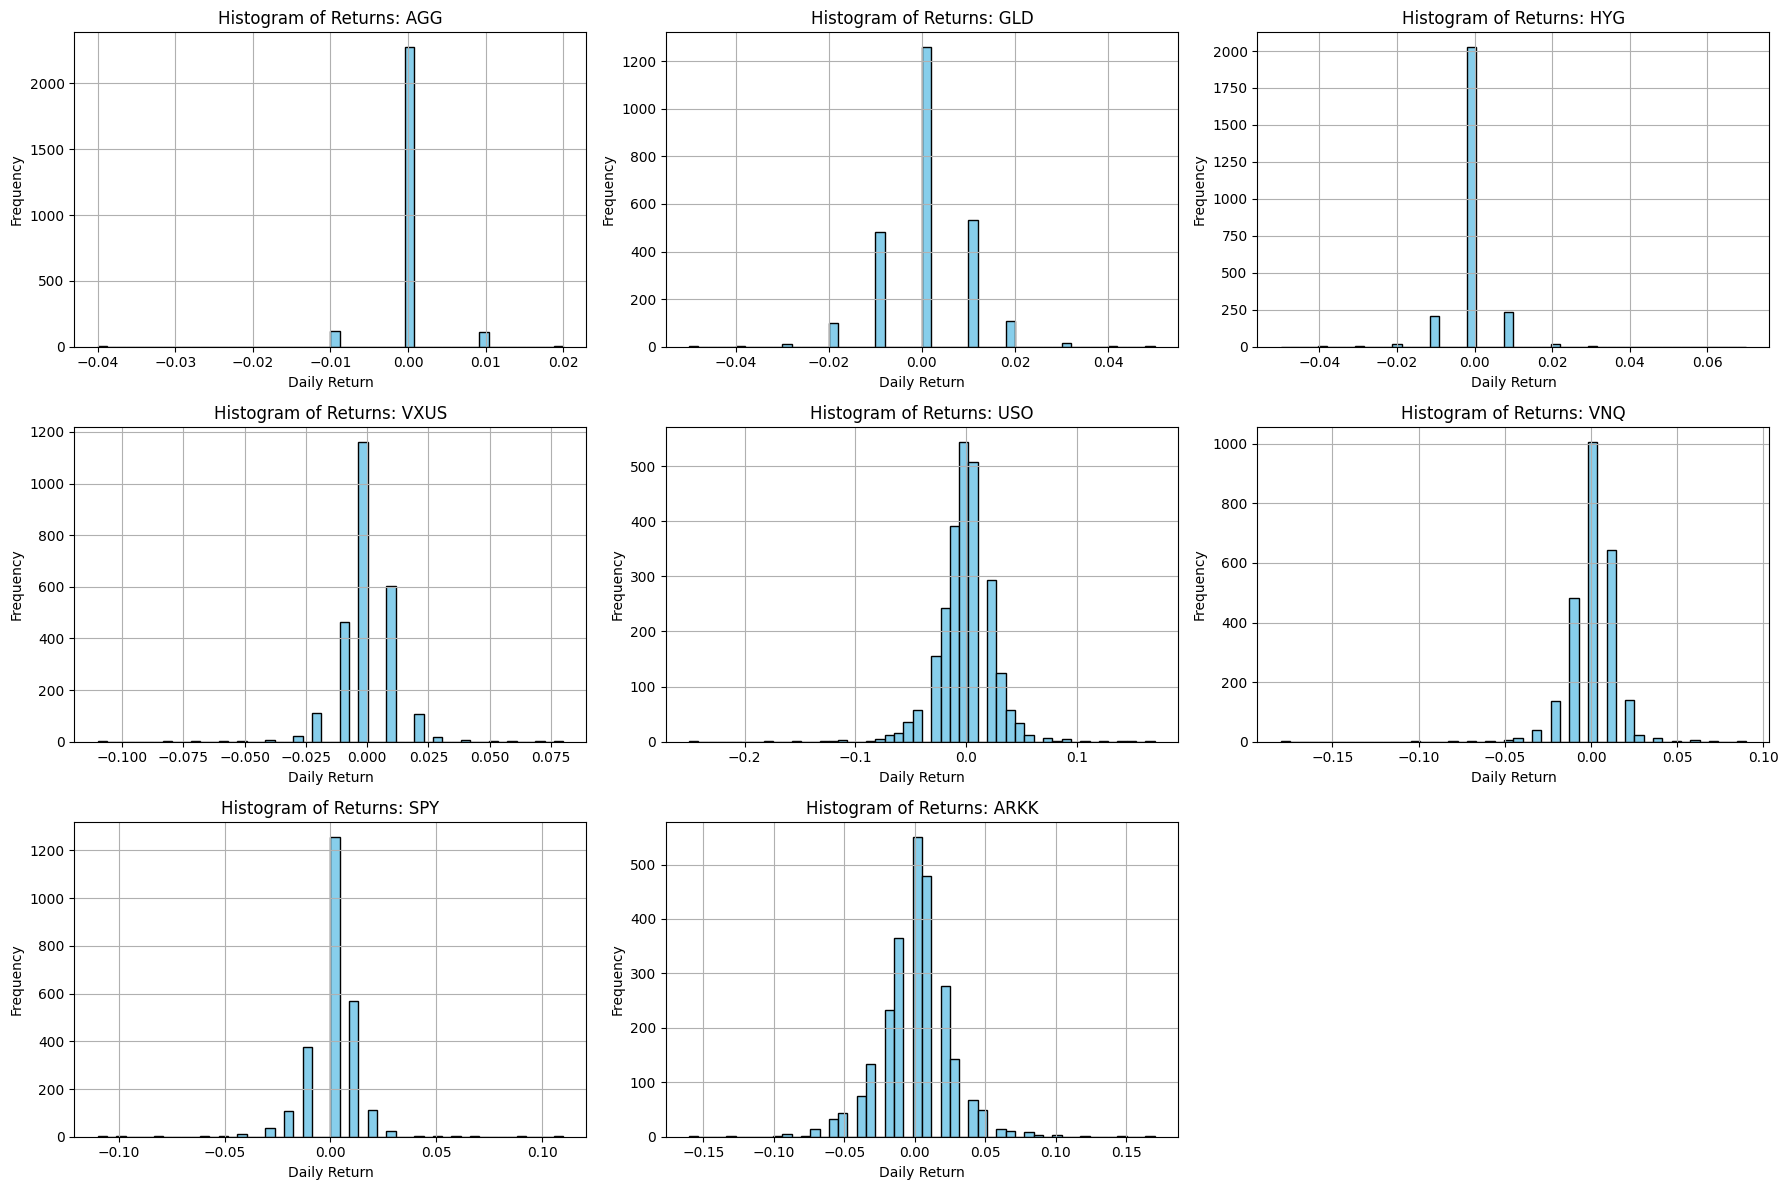

In [43]:
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
import numpy as np

tickers = df['Ticker'].unique()
n_tickers = len(tickers)
n_cols = 3  # You can adjust this
n_rows = int(np.ceil(n_tickers / n_cols))

fig, axes = plt.subplots(n_rows, n_cols, figsize=(6*n_cols, 4*n_rows))
axes = axes.flatten()

for i, ticker in enumerate(tickers):
    ax = axes[i]
    df[df['Ticker'] == ticker]['returns'].hist(ax=ax, bins=50, color='skyblue', edgecolor='black')
    ax.set_title(f'Histogram of Returns: {ticker}')
    ax.set_xlabel('Daily Return')
    ax.set_ylabel('Frequency')
    ax.grid(True)

# Hide any unused subplots
for j in range(i+1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()

# Save the grid of histograms to a single-page PDF
pdf_path = "/Users/imperator/Documents/STUDIES/UNIVERSITY OF GHANA/RESEARCH WORK/CORCHIL KELLY KWAME/PORTFOLIO OPTIMIZATION/PROJECT CODE/Dimensionality-Reduction-PortfolioOptimization/EDA/Notebooks/images"
with PdfPages(f"{pdf_path}/returns_histograms.pdf") as pdf:
    pdf.savefig(fig)
plt.show()

- Step 2: Kernel Density Estimation (KDE) Plots
    - KDE plots provide a smooth, continuous estimate of the return distribution. Unlike histograms, KDE does not rely on bin sizes, which makes it particularly useful for identifying multi-modality and subtle tail behavior. Comparing KDE plots across assets helps detect which instruments deviate significantly from normality and require custom modeling strategies.

- Purpose: To compare return shapes between ETFs more cleanly than with histograms.

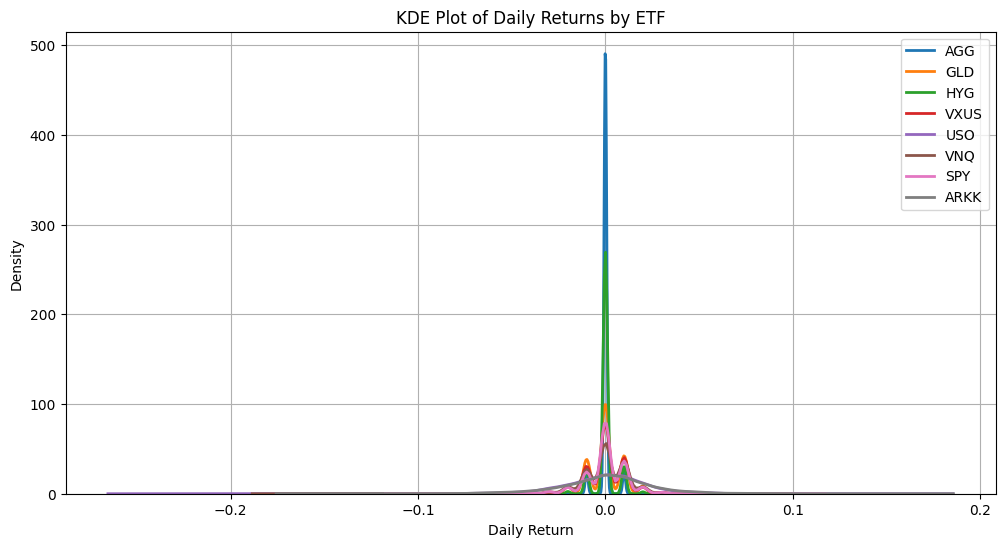

In [47]:
import seaborn as sns

plt.figure(figsize=(12, 6))
for ticker in tickers:
    sns.kdeplot(df[df['Ticker'] == ticker]['returns'], label=ticker, linewidth=2)
plt.title('KDE Plot of Daily Returns by ETF')
plt.xlabel('Daily Return')
plt.ylabel('Density')
plt.legend()
plt.grid(True)


# save pdf
pdf_path = "/Users/imperator/Documents/STUDIES/UNIVERSITY OF GHANA/RESEARCH WORK/CORCHIL KELLY KWAME/PORTFOLIO OPTIMIZATION/PROJECT CODE/Dimensionality-Reduction-PortfolioOptimization/EDA/Notebooks/images"
with PdfPages(f"{pdf_path}/returns_kde_plots.pdf") as pdf : 
    pdf.savefig()
plt.show()

- Step 3: Boxplots of Returns Across ETFs
    - Boxplots visually summarize the distribution of returns through quartiles and highlight the presence of outliers. This aids in identifying ETFs with higher interquartile variability or more extreme observations, helping inform volatility estimation, outlier treatment, or transformation needs.

- Purpose: Compare spread, outliers, and symmetry across ETFs in a compact form.


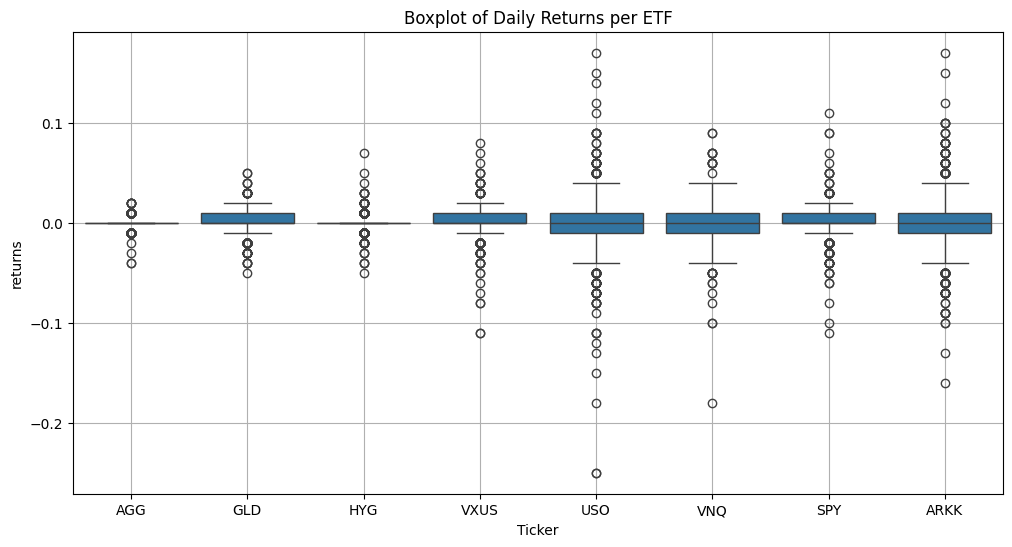

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.backends.backend_pdf import PdfPages

pdf_path = "/Users/imperator/Documents/STUDIES/UNIVERSITY OF GHANA/RESEARCH WORK/CORCHIL KELLY KWAME/PORTFOLIO OPTIMIZATION/PROJECT CODE/Dimensionality-Reduction-PortfolioOptimization/EDA/Notebooks/images"
pdf_file = f"{pdf_path}/boxplot_returns_per_etf.pdf"

with PdfPages(pdf_file) as pdf:
    # Boxplot of Daily Returns per ETF
    fig1 = plt.figure(figsize=(12, 6))
    sns.boxplot(x='Ticker', y='returns', data=df)
    plt.title('Boxplot of Daily Returns per ETF')
    plt.grid(True)
    pdf.savefig(fig1)
    plt.show()
    plt.close(fig1)


#### Correlation Matrix

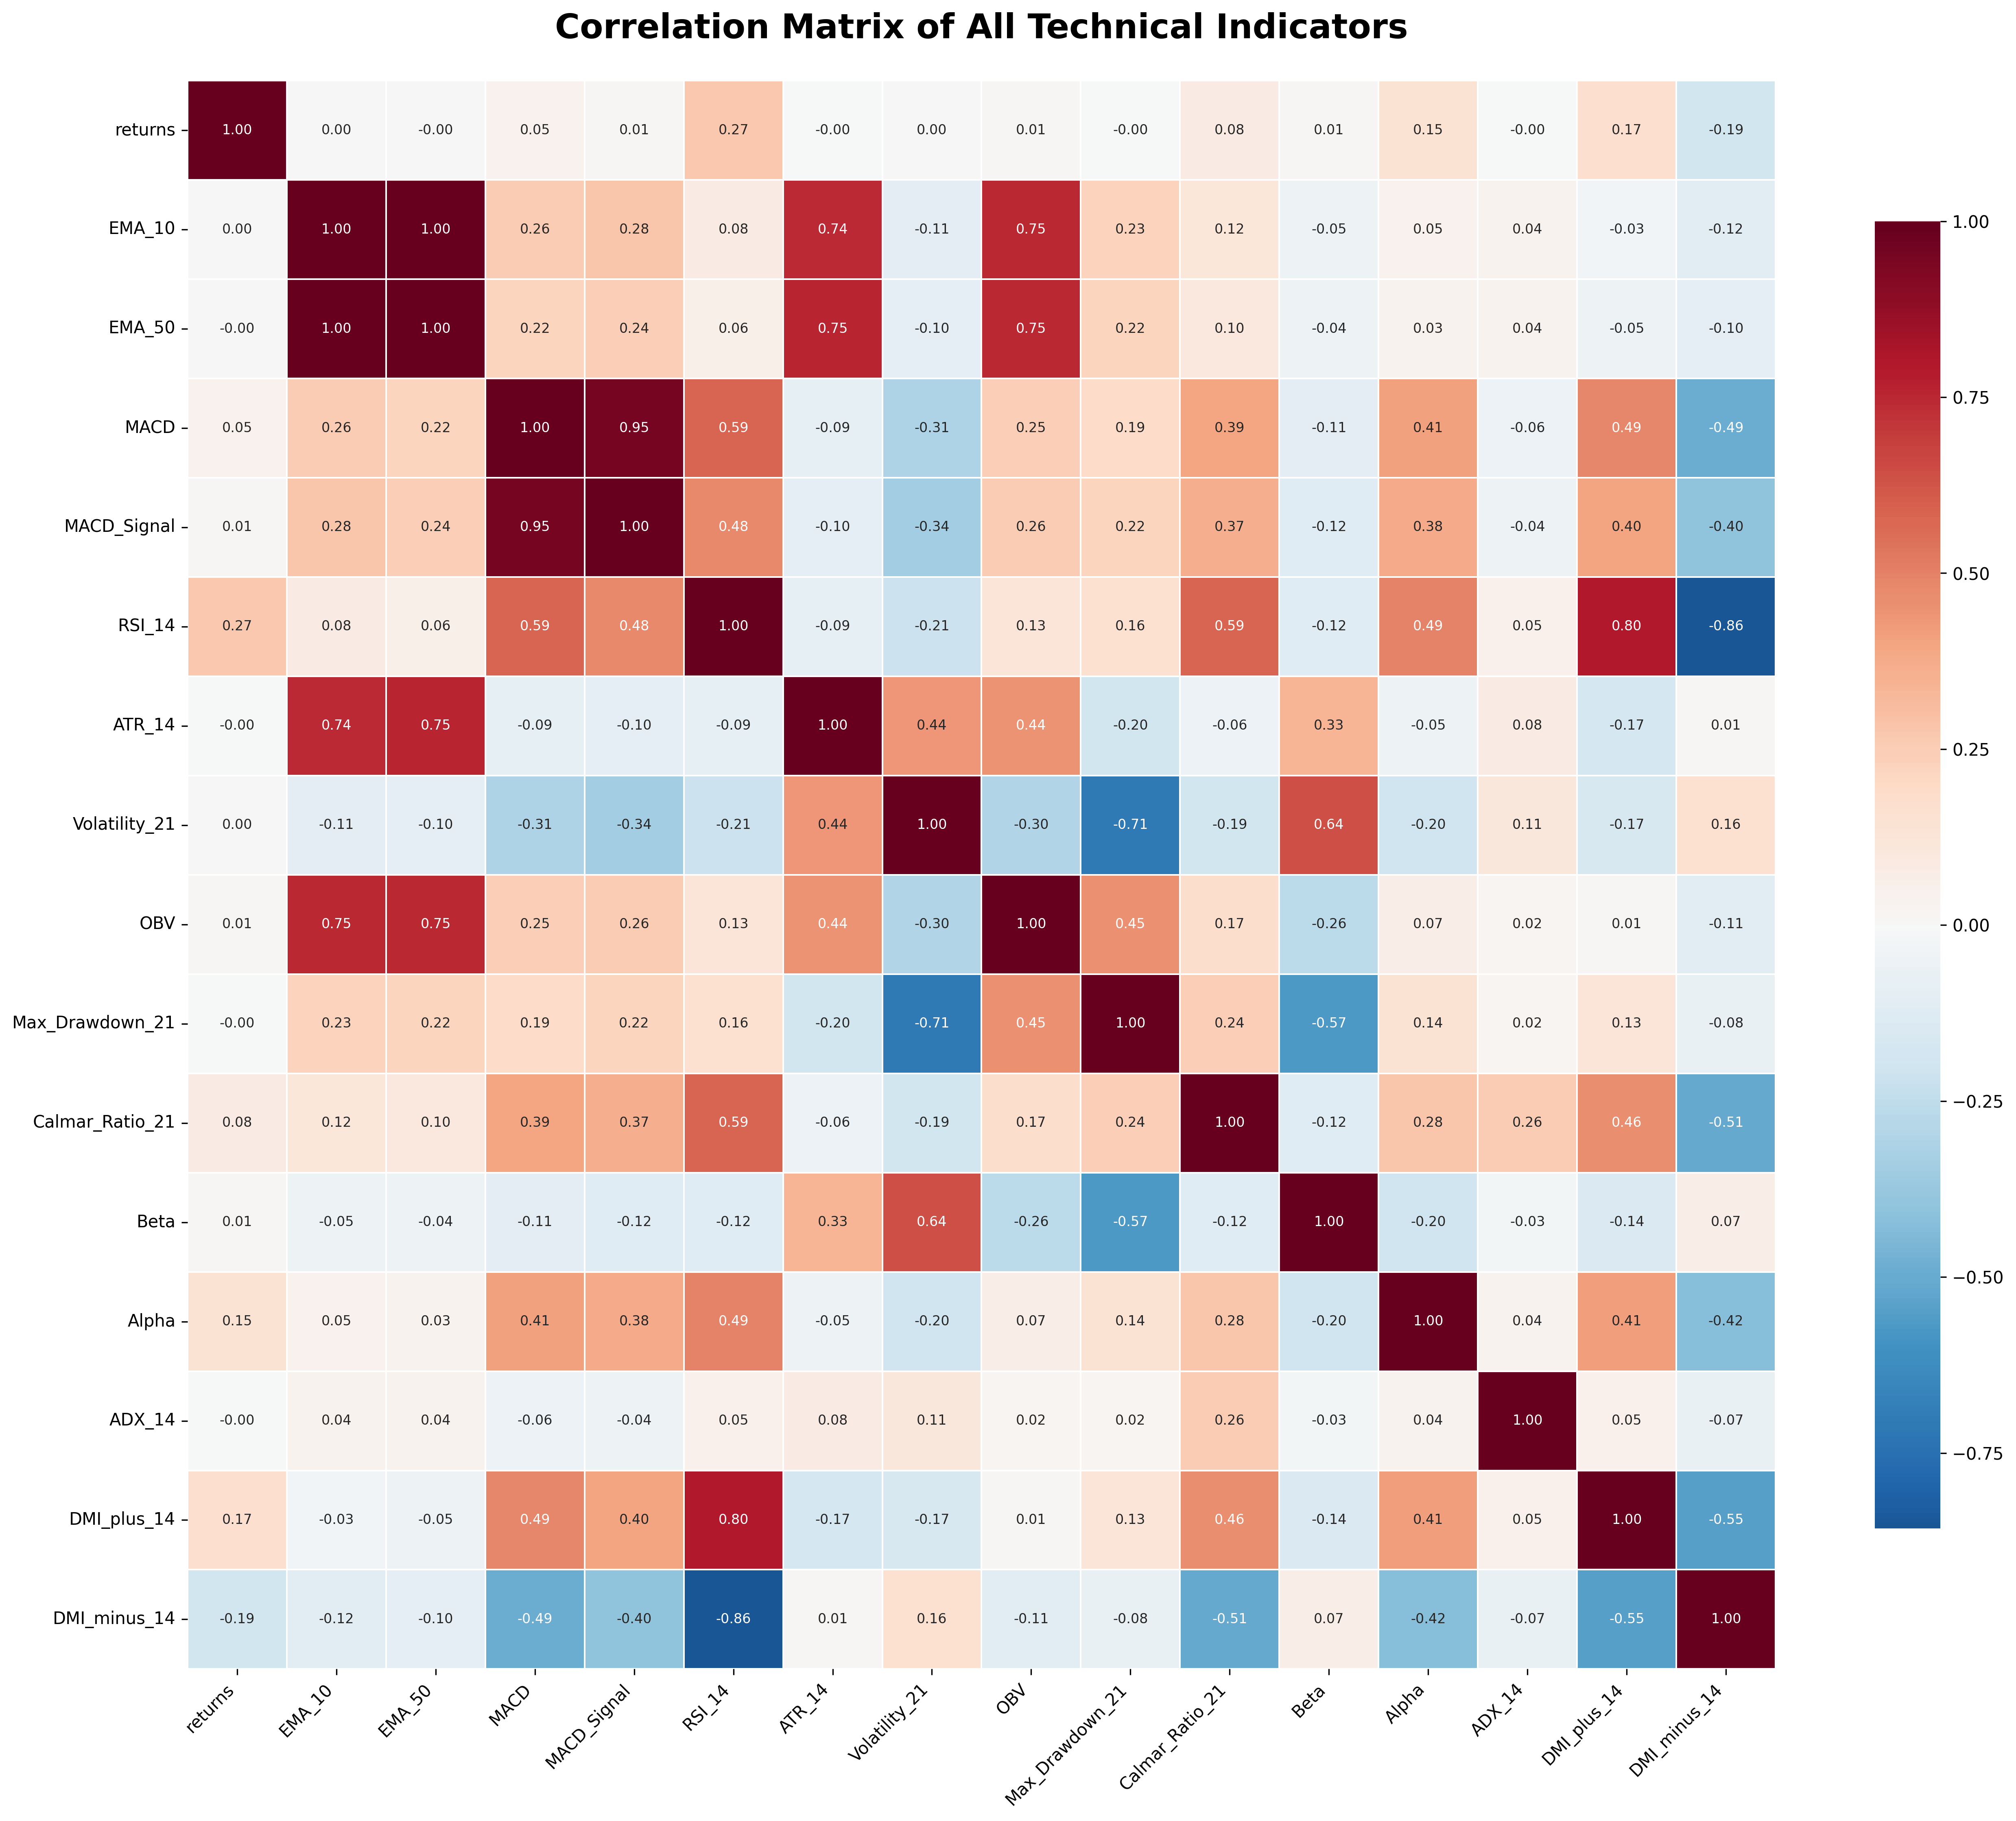


All Features Correlation Matrix Summary:
Shape: (16, 16)
Highest positive correlation (off-diagonal): 0.999
Lowest correlation (off-diagonal): -0.857

Highly correlated pairs (|correlation| > 0.8):
EMA_10 <-> EMA_50: 0.999
MACD <-> MACD_Signal: 0.953
RSI_14 <-> DMI_plus_14: 0.804
RSI_14 <-> DMI_minus_14: -0.857


In [76]:

# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# import seaborn as sns


df = pd.read_csv('/Users/imperator/Documents/STUDIES/UNIVERSITY OF GHANA/RESEARCH WORK/CORCHIL KELLY KWAME/PORTFOLIO OPTIMIZATION/PROJECT CODE/Dimensionality-Reduction-PortfolioOptimization/EDA/ETFs_datasets/Final_csv/4-etf_macro_data.csv')


# Correlation Heatmap for All Features

numerical_columns = [
'returns', 'EMA_10', 'EMA_50', 'MACD', 'MACD_Signal',
       'RSI_14', 'ATR_14', 'Volatility_21', 'OBV', 'Max_Drawdown_21',
       'Calmar_Ratio_21', 'Beta', 'Alpha', 'ADX_14', 'DMI_plus_14',
       'DMI_minus_14'
]

df_numerical = df[numerical_columns].dropna()

corr_matrix = df_numerical.corr()

plt.figure(figsize=(18, 15), dpi=300)
sns.heatmap(
    corr_matrix, annot=True, fmt=".2f", cmap='RdBu_r', center=0,
    annot_kws={"size": 8}, linewidths=0.5, square=True, cbar_kws={"shrink": 0.8}
)
plt.title('Correlation Matrix of All Technical Indicators', fontsize=20, fontweight='bold', pad=25)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(rotation=0, fontsize=10)
plt.tight_layout()
plt.savefig('correlation_matrix_all_technical_indicators.png', dpi=300, bbox_inches='tight', facecolor='white')
# plt.savefig('correlation_matrix_all_technical_indicators.svg', bbox_inches='tight', facecolor='white')
plt.show()


# Correlation Matrix Summary Statistics
def print_corr_summary(corr_matrix, name="Correlation Matrix"):
    print(f"\n{name} Summary:")
    print(f"Shape: {corr_matrix.shape}")
    # Exclude diagonal for max/min
    mask = ~np.eye(corr_matrix.shape[0], dtype=bool)
    max_corr = corr_matrix.where(mask).max().max()
    min_corr = corr_matrix.where(mask).min().min()
    print(f"Highest positive correlation (off-diagonal): {max_corr:.3f}")
    print(f"Lowest correlation (off-diagonal): {min_corr:.3f}")
    # List highly correlated pairs
    threshold = 0.8
    high_corr_pairs = []
    for i in range(len(corr_matrix.columns)):
        for j in range(i+1, len(corr_matrix.columns)):
            corr_val = corr_matrix.iloc[i, j]
            if abs(corr_val) > threshold:
                high_corr_pairs.append((corr_matrix.columns[i], corr_matrix.columns[j], corr_val))
    if high_corr_pairs:
        print(f"\nHighly correlated pairs (|correlation| > {threshold}):")
        for pair in high_corr_pairs:
            print(f"{pair[0]} <-> {pair[1]}: {pair[2]:.3f}")
    else:
        print(f"No pairs with |correlation| > {threshold}")

print_corr_summary(corr_matrix, "All Features Correlation Matrix")
# if all(col in df_numerical.columns for col in key_indicators):
#    print_corr_summary(key_corr, "Key Indicators Correlation Matrix")



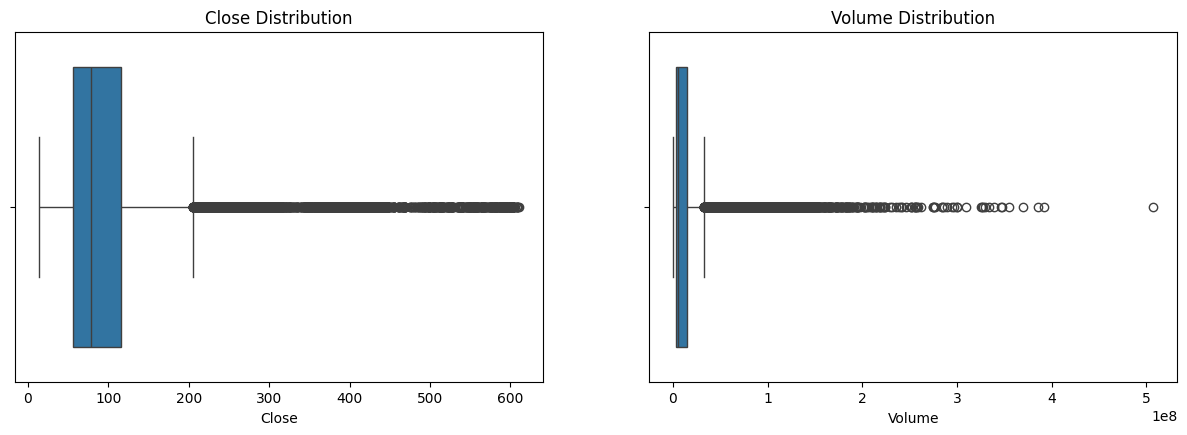

In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib_inline
import seaborn as sns

# Visualize distributions
plt.figure(figsize=(15,10))
for i, col in enumerate(['Close', 'Volume',], 1):
    plt.subplot(2,2,i)
    sns.boxplot(x=merged_df[col])
    plt.title(f'{col} Distribution')
plt.savefig('data_distributions.png')
plt.show()

# IQR Method for outlier detection
def handle_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Cap outliers instead of removing to preserve timeline
    df[col] = np.where(df[col] > upper_bound, upper_bound,
                      np.where(df[col] < lower_bound, lower_bound, df[col]))
    return df

# Apply to numerical columns
numerical_cols = ['Open', 'High', 'Low', 'Close', 'Volume']
for col in numerical_cols:
    merged_df = handle_outliers(merged_df, col)

# Reason: Preserve time series integrity while mitigating outlier impact


In [56]:

# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# import seaborn as sns


# df = pd.read_csv('/Users/imperator/Documents/STUDIES/UNIVERSITY OF GHANA/RESEARCH WORK/CORCHIL KELLY KWAME/PORTFOLIO OPTIMIZATION/PROJECT CODE/Dimensionality-Reduction-PortfolioOptimization/ETFs_datasets/Final_csv/indicators_output_new.csv')


# Correlation Heatmap for All Features

numerical_columns = [
'returns','EMA_10',
'RSI_14', 'RSI_30', 'MACD', 'MACD_Signal', 'MACD_Histogram',
'ADX_14', 'DMI_plus_14', 'DMI_minus_14',
'ADX_30', 'DMI_plus_30', 'DMI_minus_30',
'ATR_14', 'ATR_30',
'Stoch_K', 'Stoch_D',
'OBV'

]


df_numerical = df[numerical_columns].dropna()

corr_matrix = df_numerical.corr()

plt.figure(figsize=(18, 15), dpi=300)
sns.heatmap(
    corr_matrix, annot=True, fmt=".2f", cmap='RdBu_r', center=0,
    annot_kws={"size": 8}, linewidths=0.5, square=True, cbar_kws={"shrink": 0.8}
)
plt.title('Correlation Matrix of All Technical Indicators', fontsize=20, fontweight='bold', pad=25)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(rotation=0, fontsize=10)
plt.tight_layout()
plt.savefig('correlation_matrix_all_features.png', dpi=300, bbox_inches='tight', facecolor='white')
plt.savefig('correlation_matrix_all_features.svg', bbox_inches='tight', facecolor='white')
plt.show()


# Correlation Matrix Summary Statistics
def print_corr_summary(corr_matrix, name="Correlation Matrix"):
    print(f"\n{name} Summary:")
    print(f"Shape: {corr_matrix.shape}")
    # Exclude diagonal for max/min
    mask = ~np.eye(corr_matrix.shape[0], dtype=bool)
    max_corr = corr_matrix.where(mask).max().max()
    min_corr = corr_matrix.where(mask).min().min()
    print(f"Highest positive correlation (off-diagonal): {max_corr:.3f}")
    print(f"Lowest correlation (off-diagonal): {min_corr:.3f}")
    # List highly correlated pairs
    threshold = 0.8
    high_corr_pairs = []
    for i in range(len(corr_matrix.columns)):
        for j in range(i+1, len(corr_matrix.columns)):
            corr_val = corr_matrix.iloc[i, j]
            if abs(corr_val) > threshold:
                high_corr_pairs.append((corr_matrix.columns[i], corr_matrix.columns[j], corr_val))
    if high_corr_pairs:
        print(f"\nHighly correlated pairs (|correlation| > {threshold}):")
        for pair in high_corr_pairs:
            print(f"{pair[0]} <-> {pair[1]}: {pair[2]:.3f}")
    else:
        print(f"No pairs with |correlation| > {threshold}")

print_corr_summary(corr_matrix, "All Features Correlation Matrix")
if all(col in df_numerical.columns for col in key_indicators):
   print_corr_summary(key_corr, "Key Indicators Correlation Matrix")



KeyError: "['SMA_10', 'SMA_20', 'EMA_20', 'SMA_30', 'EMA_30', 'SMA_50', 'SMA_100', 'EMA_100', 'SMA_200', 'EMA_200', 'BB_Upper_20', 'BB_Middle_20', 'BB_Lower_20', 'BB_Upper_50', 'BB_Middle_50', 'BB_Lower_50', 'RSI_30', 'MACD_Histogram', 'ADX_30', 'DMI_plus_30', 'DMI_minus_30', 'ATR_30', 'Stoch_K', 'Stoch_D'] not in index"

- Correlation Matrix for key technical indicators ONLY

In [66]:
key_indicators = ['Close', 'Volume', 'RSI_14', 'MACD', 'ATR_14', 'SMA_20', 'EMA_20', 'BB_Middle']
if all(col in df_numerical.columns for col in key_indicators):
    key_corr = df_numerical[key_indicators].corr()
    plt.figure(figsize=(10, 8), dpi=300)
    sns.heatmap(
        key_corr, annot=True, fmt=".2f", cmap='RdBu_r', center=0,
        annot_kws={"size": 12}, linewidths=0.5, square=True, cbar_kws={"shrink": 0.8}
    )
    plt.title('Correlation Matrix - (Key Technical Indicators', fontsize=16, fontweight='bold', pad=25)
    plt.xticks(rotation=45, ha='right', fontsize=11)
    plt.yticks(rotation=0, fontsize=11)
    plt.tight_layout()
    plt.savefig('correlation_matrix_key_indicators.png', dpi=300, bbox_inches='tight', facecolor='white')
    plt.savefig('correlation_matrix_key_indicators.svg', bbox_inches='tight', facecolor='white')
    plt.show()


NameError: name 'df_numerical' is not defined

### Time Series on Asset Returns on ETFs

- Raw Price Series

In [61]:
df.info()
#coerce the date to datetime format
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
# Set 'Date' as index
df.set_index('Date', inplace=True)
# Check for missing values
missing = df.isnull().sum()
print("Missing Values After Processing:\n", missing[missing > 0])


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20120 entries, 0 to 20119
Data columns (total 43 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Date                      20120 non-null  datetime64[ns]
 1   Ticker                    20120 non-null  object        
 2   Close                     20120 non-null  float64       
 3   High                      20120 non-null  float64       
 4   Low                       20120 non-null  float64       
 5   Open                      20120 non-null  float64       
 6   Volume                    20120 non-null  int64         
 7   returns                   20120 non-null  float64       
 8   EMA_10                    20120 non-null  float64       
 9   EMA_50                    20120 non-null  float64       
 10  MACD                      20120 non-null  float64       
 11  MACD_Signal               20120 non-null  float64       
 12  RSI_14            

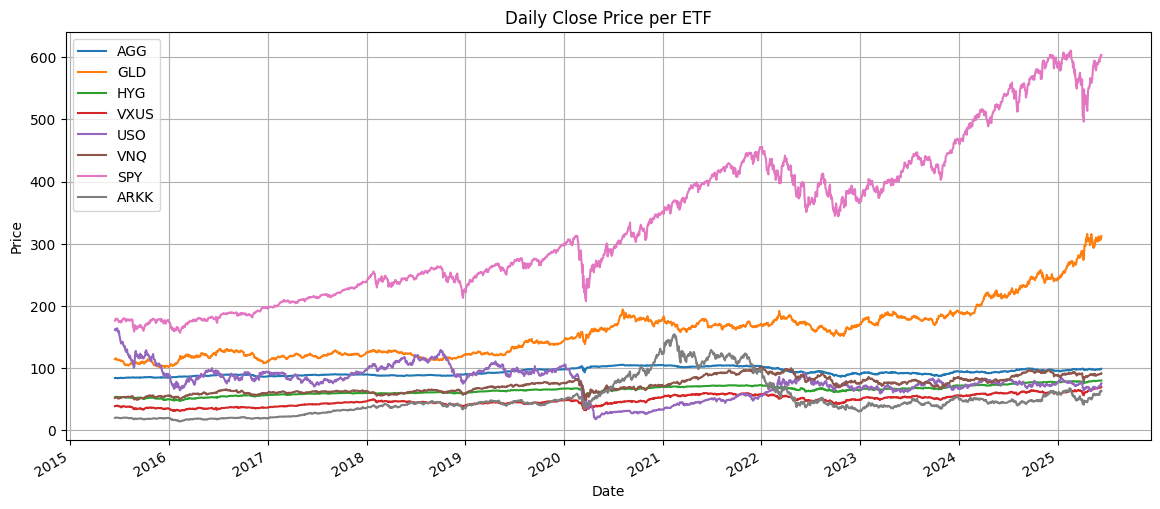

In [62]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))
for ticker in df['Ticker'].unique():
    df[df['Ticker'] == ticker]['Close'].plot(label=ticker)
plt.title('Daily Close Price per ETF')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()


- Time Series of ETF Daily Returns

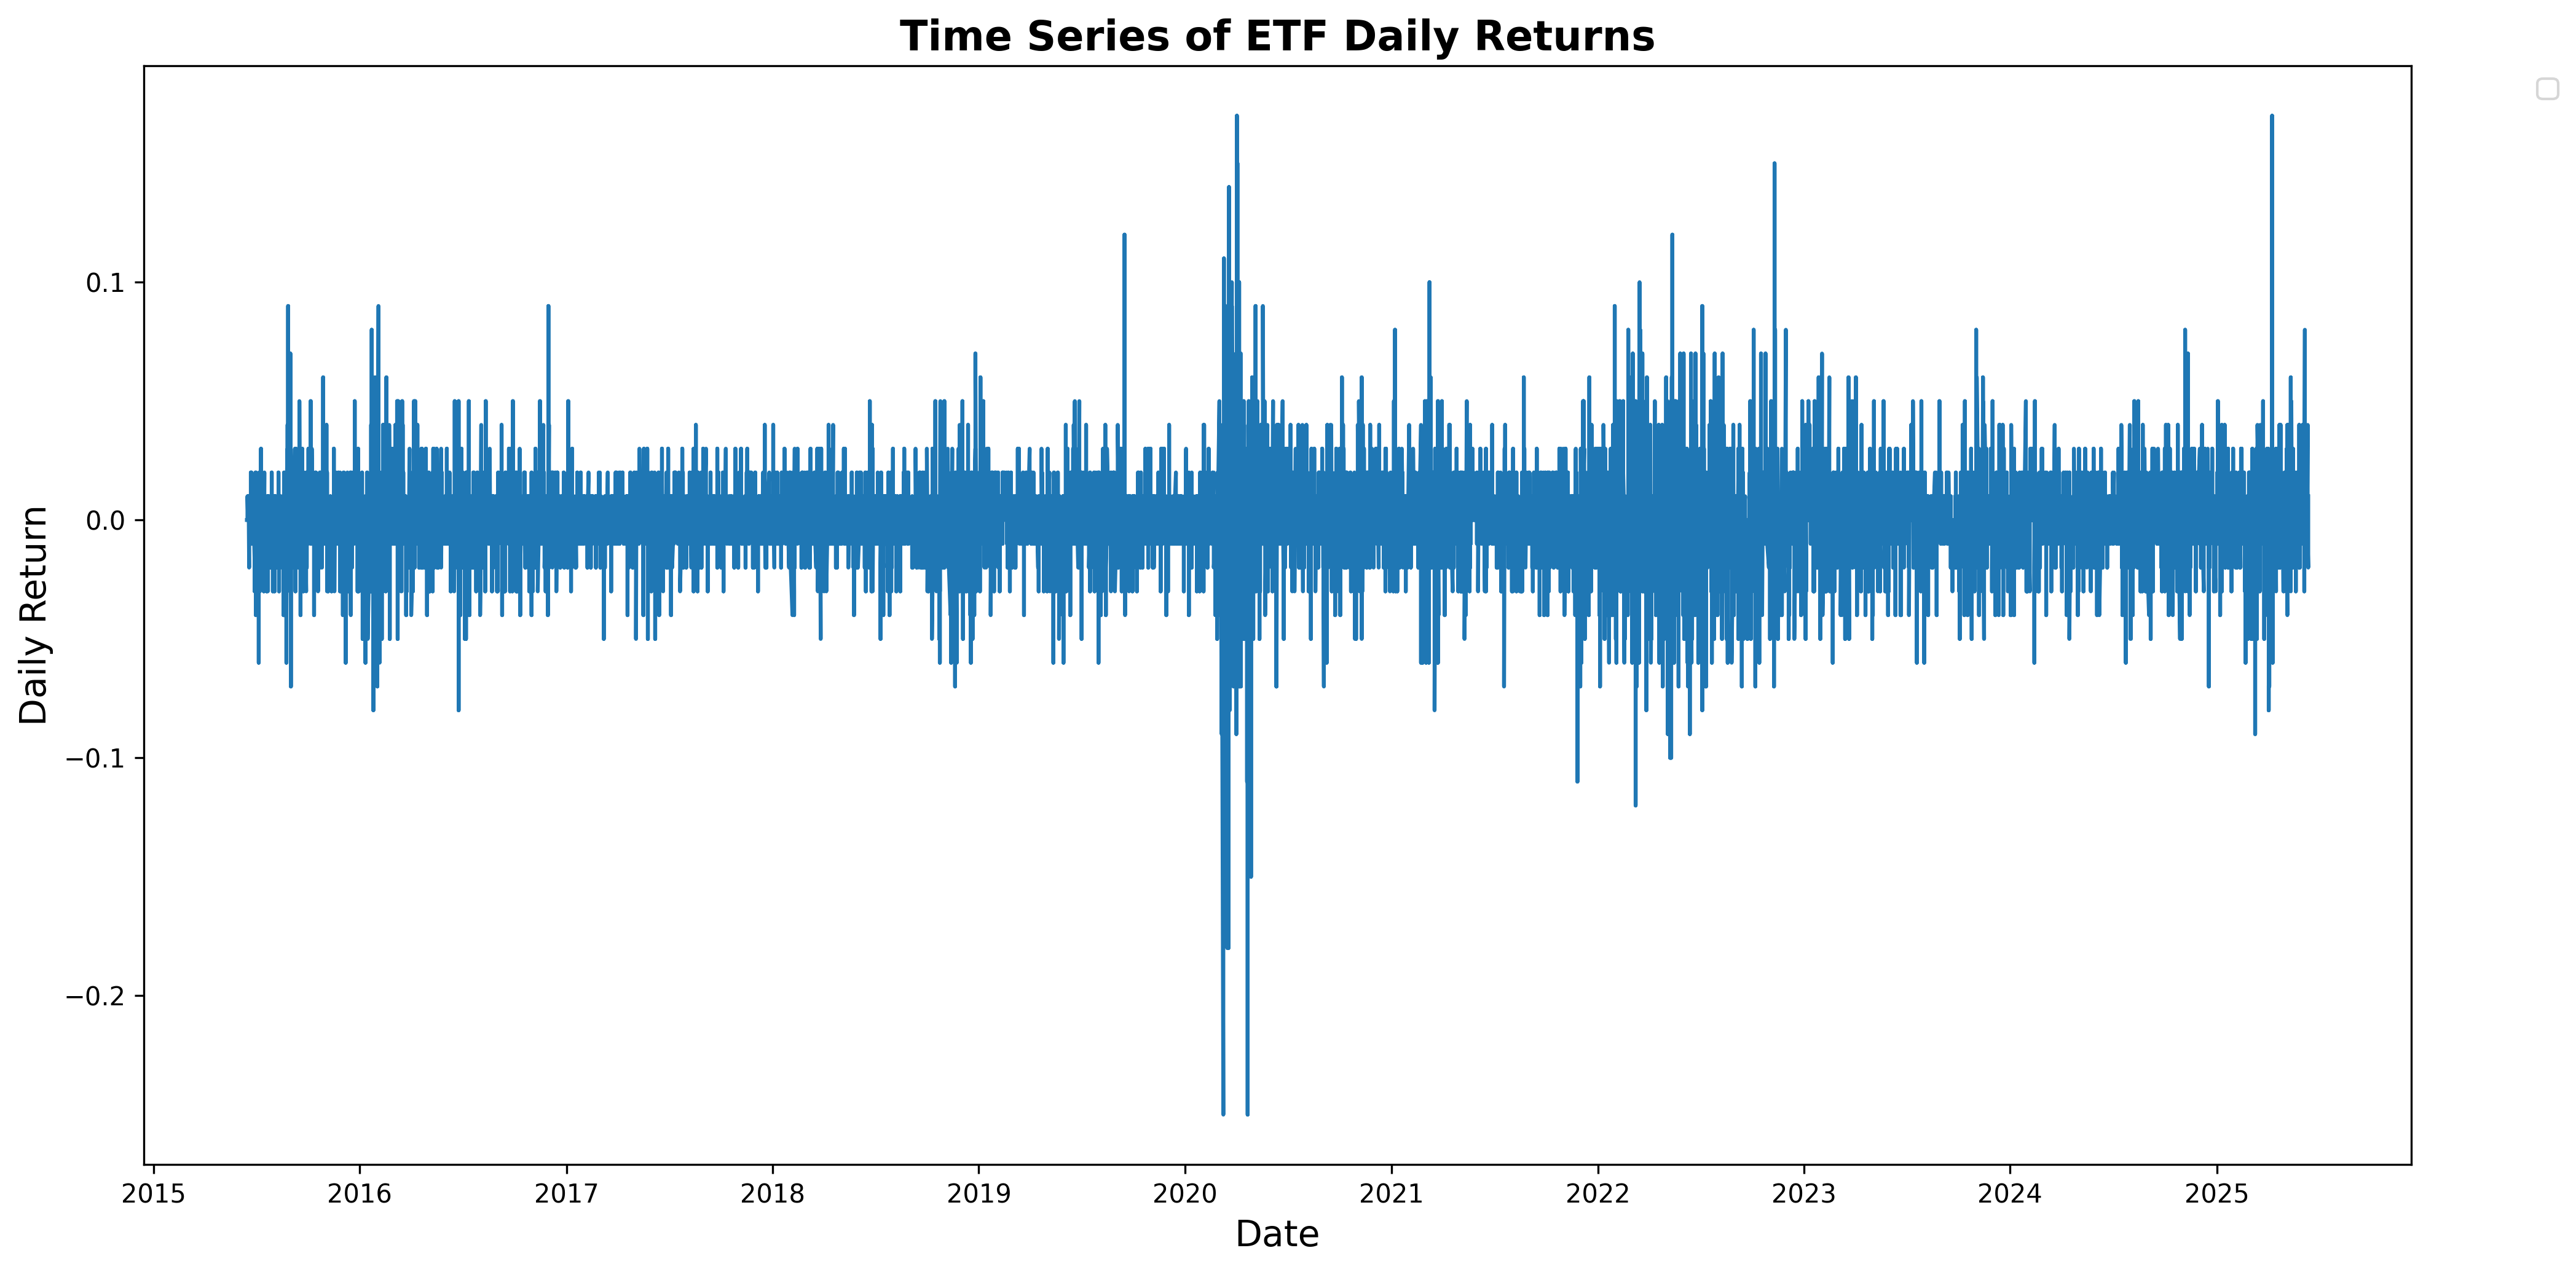

In [65]:
import pandas as pd
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 7), dpi=300)
for col in [c for c in df.columns if c.endswith('returns') or c == 'DailyReturn']:
    plt.plot(df.index, df[col], label=col.replace('returns', ''), linewidth=1.5)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Daily Return', fontsize=14)
plt.title('Time Series of ETF Daily Returns', fontsize=16, fontweight='bold')
plt.legend(fontsize=10, bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig('time_series_etf_returns.png', dpi=300, bbox_inches='tight', facecolor='white')
plt.show()

## Naive-Baseline Portfolio

- EWP (with Date as Index and Ticker as Column)

In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Ensure 'Date' is the index
df = df.copy()
df.index.name = 'Date'  # optional, for clarity

# STEP 1: Drop any missing returns
df = df.dropna(subset=['returns'])

# STEP 2: Group by date and calculate mean return across all ETFs for that date
equal_weighted_returns = df.groupby(df.index)['returns'].mean()

# STEP 3: Compute cumulative returns
cumulative_return = (1 + equal_weighted_returns).cumprod()

# STEP 4: Performance metrics
risk_free_rate = 0.02 / 252  # Daily RF
excess = equal_weighted_returns - risk_free_rate

# Handle edge cases
if excess.std() > 0:
    sharpe_ratio = (excess.mean() / excess.std()) * np.sqrt(252)
else:
    sharpe_ratio = np.nan

downside = equal_weighted_returns[equal_weighted_returns < 0]
if downside.std() > 0:
    sortino_ratio = (excess.mean() / downside.std()) * np.sqrt(252)
else:
    sortino_ratio = np.nan

# Max Drawdown
rolling_max = cumulative_return.cummax()
drawdown = (cumulative_return - rolling_max) / rolling_max
max_drawdown = drawdown.min()

# Display results
print(f"Sharpe Ratio: {sharpe_ratio:.4f}")
print(f"Sortino Ratio: {sortino_ratio:.4f}")
print(f"Max Drawdown: {max_drawdown:.2%}")


Sharpe Ratio: 0.3862
Sortino Ratio: 0.4611
Max Drawdown: -29.67%


- Equal-Weighted Portfolio Performance


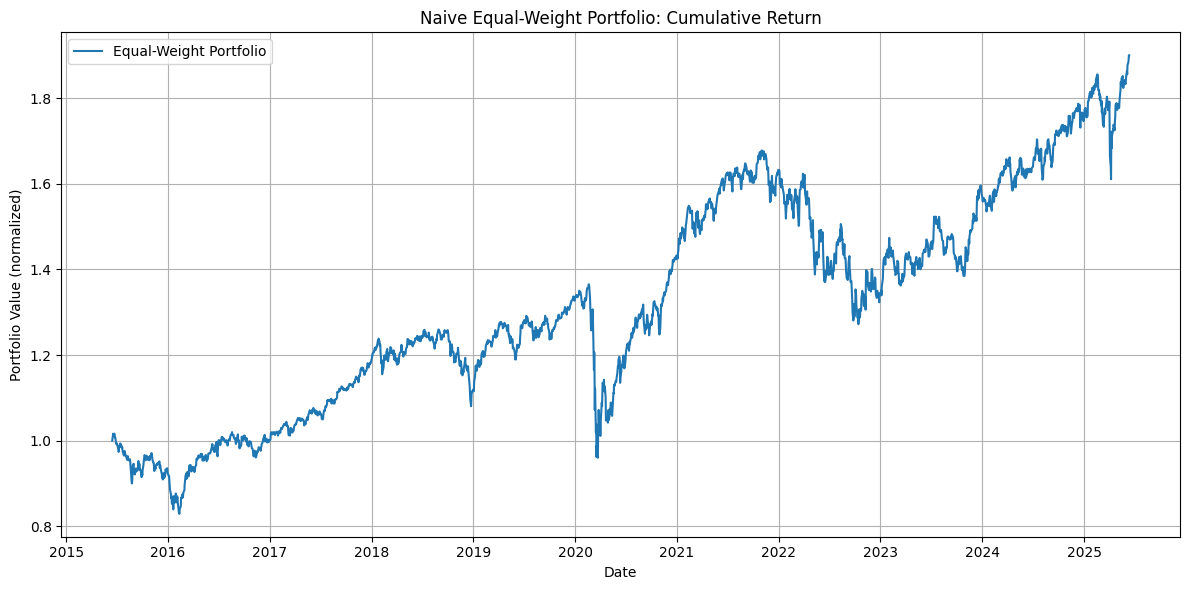

In [75]:
plt.figure(figsize=(12, 6))
plt.plot(cumulative_return, label='Equal-Weight Portfolio')
plt.title('Naive Equal-Weight Portfolio: Cumulative Return')
plt.xlabel('Date')
plt.ylabel('Portfolio Value (normalized)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


## Outlier Handling and Detection

- Detecting Outliers of Features

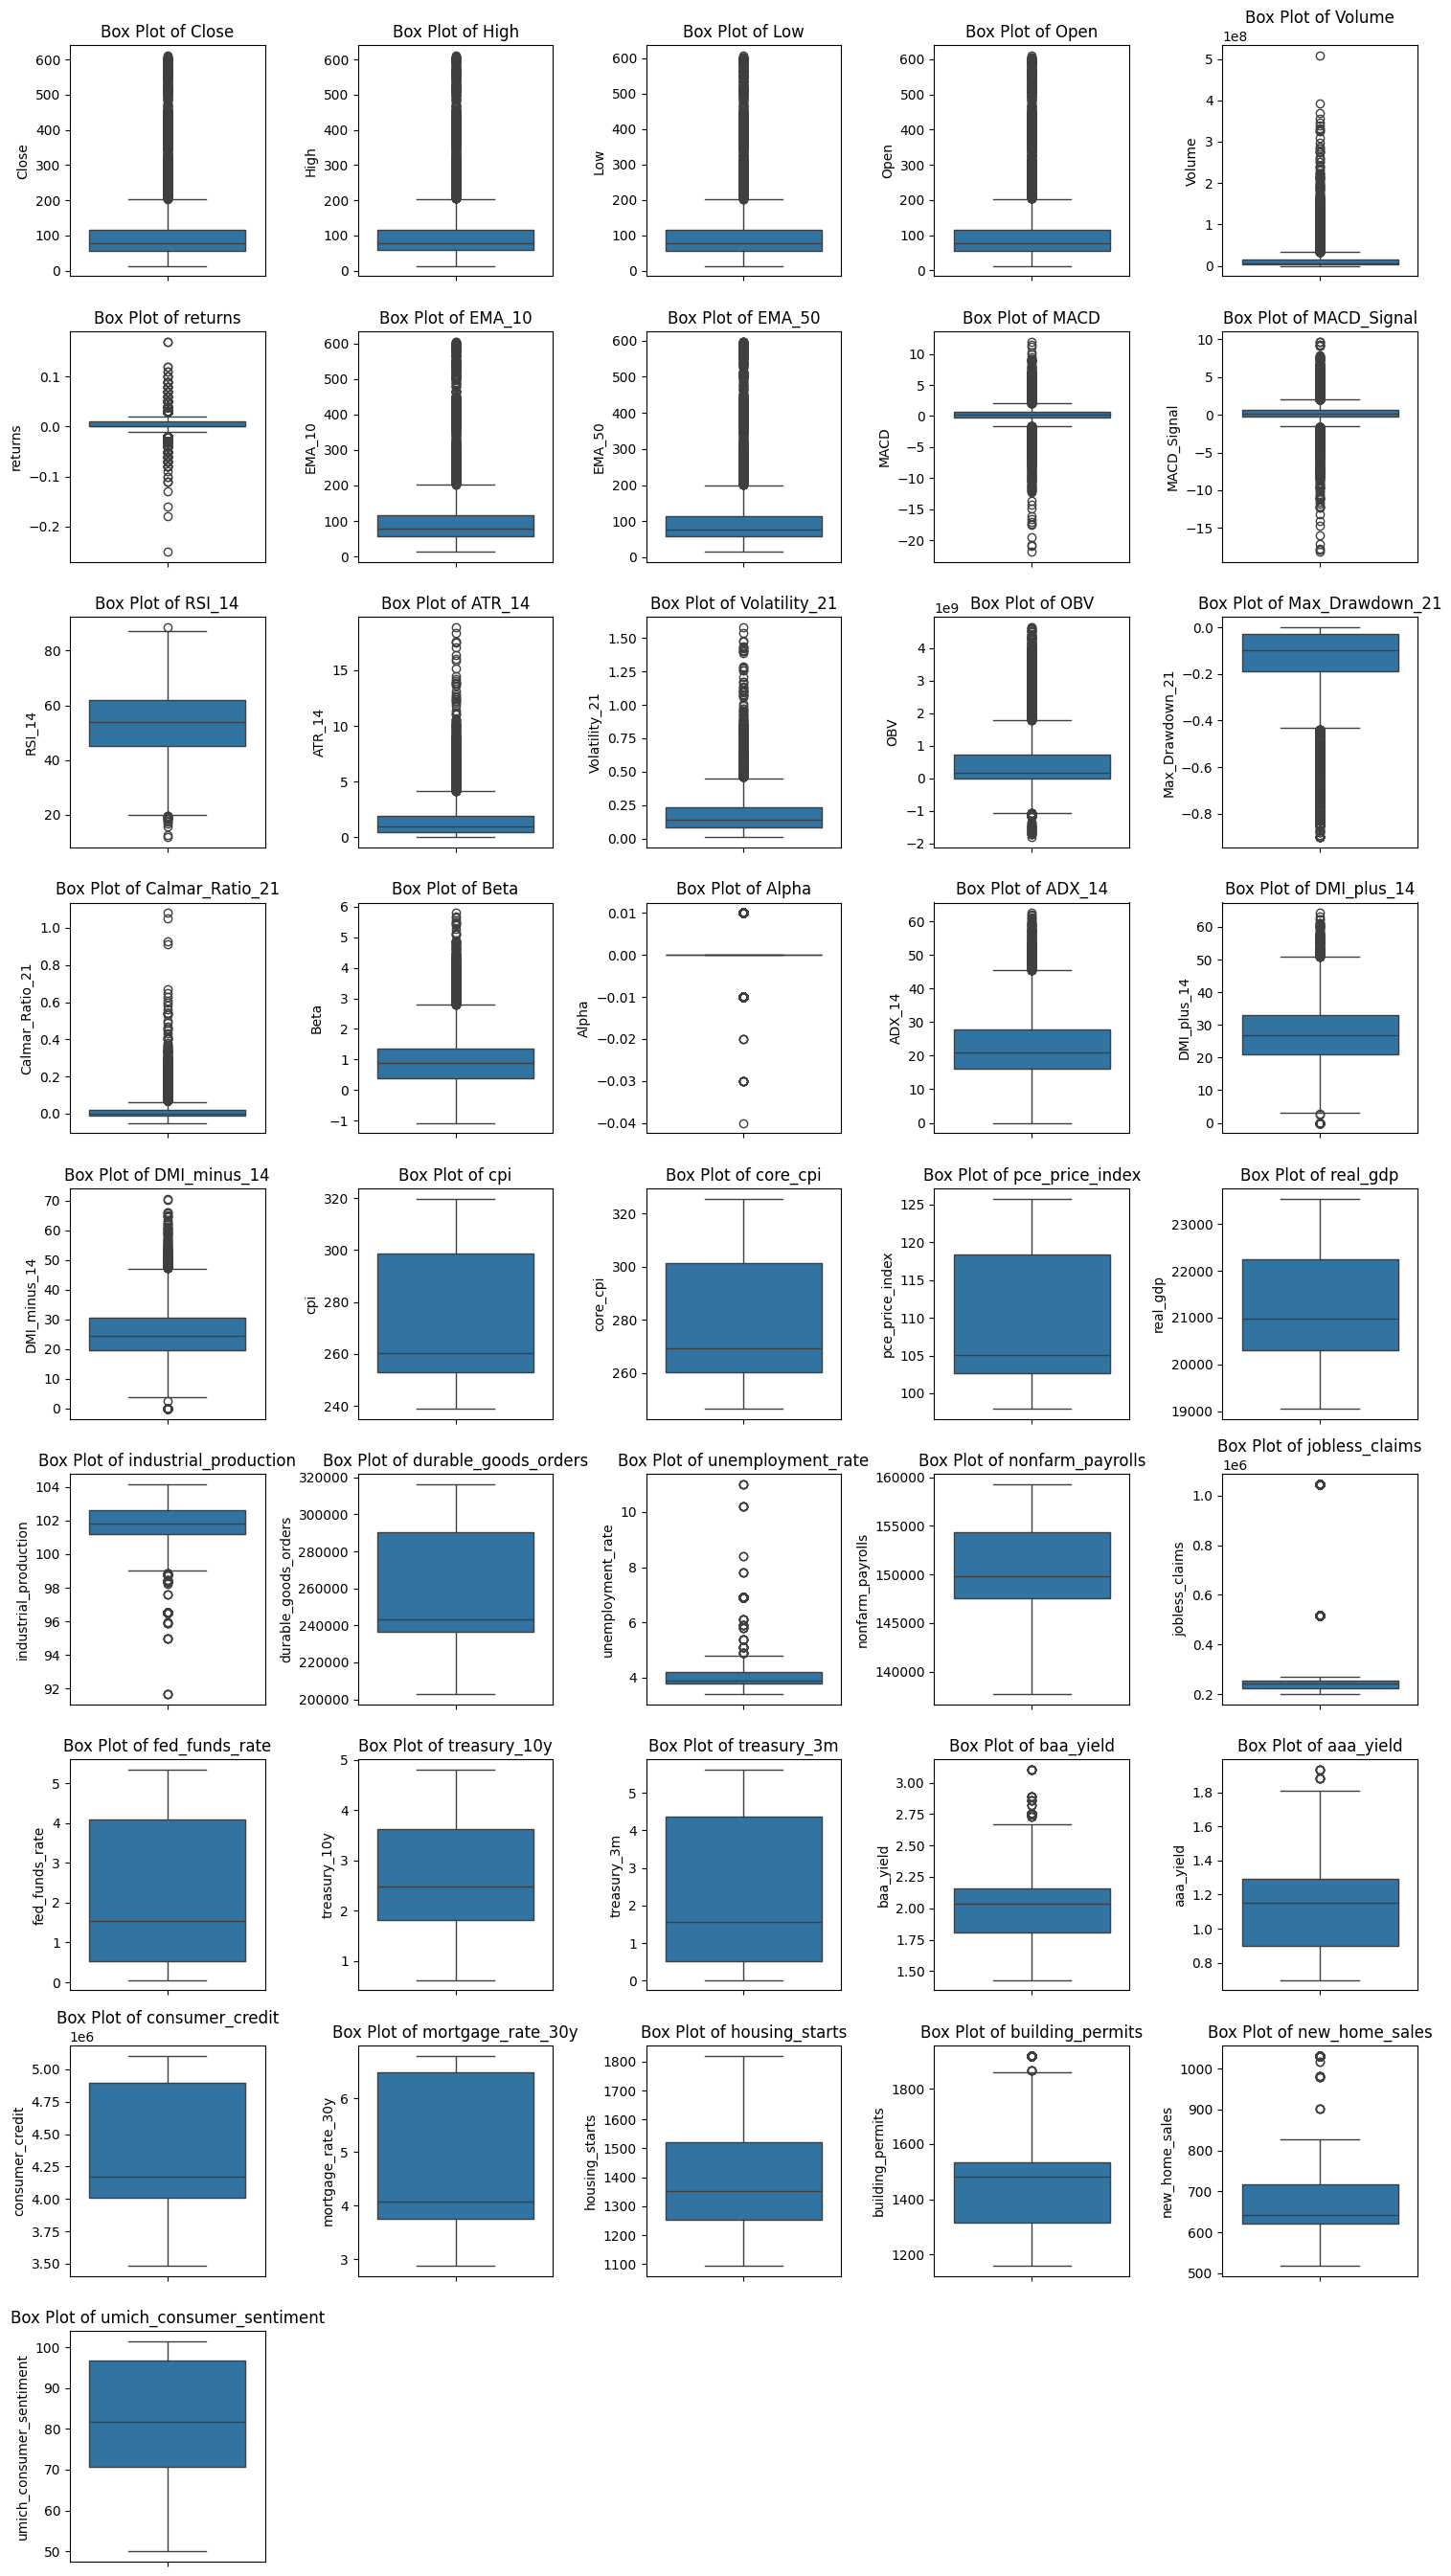

In [76]:
import seaborn as sns
import matplotlib.pyplot as plt

# Sample the data to reduce size (e.g., 10,000 rows)
sampled_df = df.sample(n=10000, random_state=42)

# Exclude columns that start with 'Unnamed'
cols_to_exclude = [col for col in sampled_df.columns if col.startswith('Unnamed')]
numerical_cols = sampled_df.select_dtypes(include=['float64', 'int64']).columns
numerical_cols = [col for col in numerical_cols if sampled_df[col].notna().any() and col not in cols_to_exclude]

# Dynamically calculate grid size
num_cols = len(numerical_cols)
rows = (num_cols // 5) + (num_cols % 5 > 0)

plt.figure(figsize=(15, rows * 3))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(rows, 5, i)
    sns.boxplot(y=sampled_df[col])
    plt.title(f'Box Plot of {col}')
    plt.tight_layout()

# Save to PDF
pdf_path = "/Users/imperator/Documents/STUDIES/UNIVERSITY OF GHANA/RESEARCH WORK/CORCHIL KELLY KWAME/PORTFOLIO OPTIMIZATION/PROJECT CODE/Dimensionality-Reduction-PortfolioOptimization/EDA/Notebooks/images"
pdf_file = f"{pdf_path}/outliers.pdf"
with PdfPages(pdf_file) as pdf:
    pdf.savefig(plt.gcf())
    plt.show()
    plt.close()

#### Observations from the Box Plots of Technical Indicators
Box Plot Analysis and Its Implications for Portfolio Optimization
The box plots presented for each technical indicator (see Figure X) reveal a summary of the central tendency, spread, and presence of outliers across all features prior to dimensionality reduction. Each subplot corresponds to a specific indicator, allowing for a comprehensive comparison of their statistical distributions.

- Key Observations
    1. Prevalence of Outliers
        - Almost all indicators, including price-based features (Close, High, Low, Open), moving averages (e.g., SMA_20, EMA_20, SMA_200), and volatility bands (BB_Upper, BB_Lower), display a significant number of outliers, as evidenced by the numerous points plotted outside the whiskers of each box plot. 

        - The indicator OBV (On-Balance Volume) shows particularly extreme outliers, with values reaching up to the order of 10 (raised to the power 10) , indicating very large volume spikes or cumulative effects over time.

        - The Volume indicator itself also exhibits a long tail, suggesting sporadic periods of unusually high trading activity.

    2. Central Tendency and Spread
        - For most price-based and moving average indicators, the boxes (interquartile ranges) are tightly clustered near the lower end of the value axis, while the whiskers extend upwards, reflecting a positively skewed distribution.

        - Indicators such as MACD, MACD_Signal, and MACD_Histogram have boxes centered around zero, consistent with their design as oscillators that capture momentum shifts rather than absolute price levels.

        - The RSI_14 (Relative Strength Index) box plot is more symmetric, with the majority of values falling between 30 and 70, as expected for this bounded momentum indicator.

    3. Skewness and Distribution Shape
        - The majority of moving average indicators (SMA and EMA of various windows) and Bollinger Bands exhibit strong positive skewness, with a large number of relatively small values and a few extremely high values.

        - The ATR_14 (Average True Range) and MACD_Histogram also display some degree of skewness and outlier presence, suggesting occasional periods of high volatility or abrupt price changes.

    4. Redundancy and Similarity
        - The box plots for different moving averages (e.g., SMA_10, SMA_20, SMA_30, SMA_50, SMA_100, SMA_200 and their EMA counterparts) are visually almost indistinguishable in terms of median, interquartile range, and outlier structure. This visual redundancy is consistent with the high correlations previously observed in the correlation matrix and further supports the case for dimensionality reduction.

    5. Indicators with Distinctive Distributions
        - RSI_14 stands out with a more compact and symmetric distribution, reflecting its bounded nature (0–100) and its role as a normalized momentum indicator.

        - MACD-related indicators and ATR_14 have their own unique distribution shapes, indicating that they may provide information orthogonal to the price and volume-based features.



- Impact on Traditional Portfolio Optimization
    Traditional portfolio optimization models, such as the Markowitz mean-variance framework, assume that input features (e.g., asset returns or factors) are well-behaved, with minimal multicollinearity and outlier influence. However, the presence of extreme outliers and redundant features, as evidenced in these box plots, can:

    1. Destabilize Covariance Estimates:
        Outliers and multicollinearity inflate and destabilize the covariance matrix, leading to erratic and non-robust optimal portfolio weights.

    2. Increase Estimation Error:
        Redundant features provide little new information but contribute noise, increasing the risk of overfitting and poor out-of-sample performance.

    3. Complicate Model Interpretation:
        High-dimensional, correlated, and skewed features make it difficult to interpret the drivers of portfolio risk and return.


- Necessity for Dimensionality Reduction
    Given these challenges, dimensionality reduction techniques such as Principal Component Analysis (PCA) or autoencoders become essential. By transforming the original, highly correlated and outlier-prone features into a lower-dimensional set of orthogonal components, dimensionality reduction:

    1. Mitigates Multicollinearity:
        Ensures that input features for optimization are uncorrelated, stabilizing covariance estimation.

    2. Reduces Outlier Influence:
        Compresses the data into principal components, often diminishing the impact of extreme values.

    3. Enhances Model Robustness and Efficiency:
        Streamlines the feature set, improving computational tractability and the generalizability of portfolio optimization models.


- Univariate Outlier Detection
Detecting outliers in daily returns or a specific feature like 'Volatility_21'.

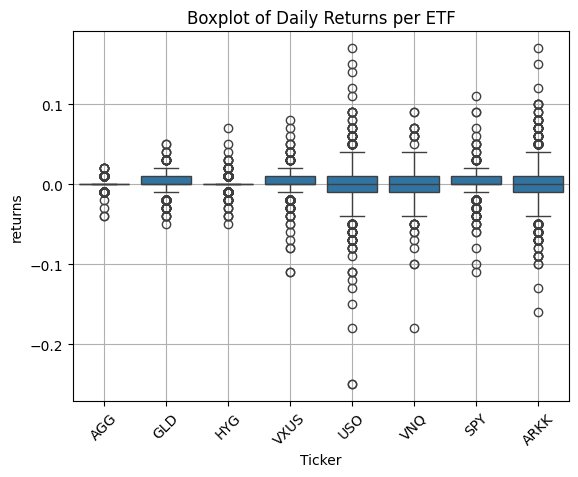

In [77]:
## Box plot and IQR method
import seaborn as sns
import matplotlib.pyplot as plt

# Example: Daily returns boxplot
sns.boxplot(data=df, x='Ticker', y='returns')
plt.title("Boxplot of Daily Returns per ETF")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


- Detecting Outliers Using IQR

In [78]:
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return df[(df[column] < lower) | (df[column] > upper)]

# Example: Outliers in returns
return_outliers = detect_outliers_iqr(df, 'returns')
print(f"Number of return outliers: {len(return_outliers)}")


Number of return outliers: 2427


#### HANDLING OUTLIERS

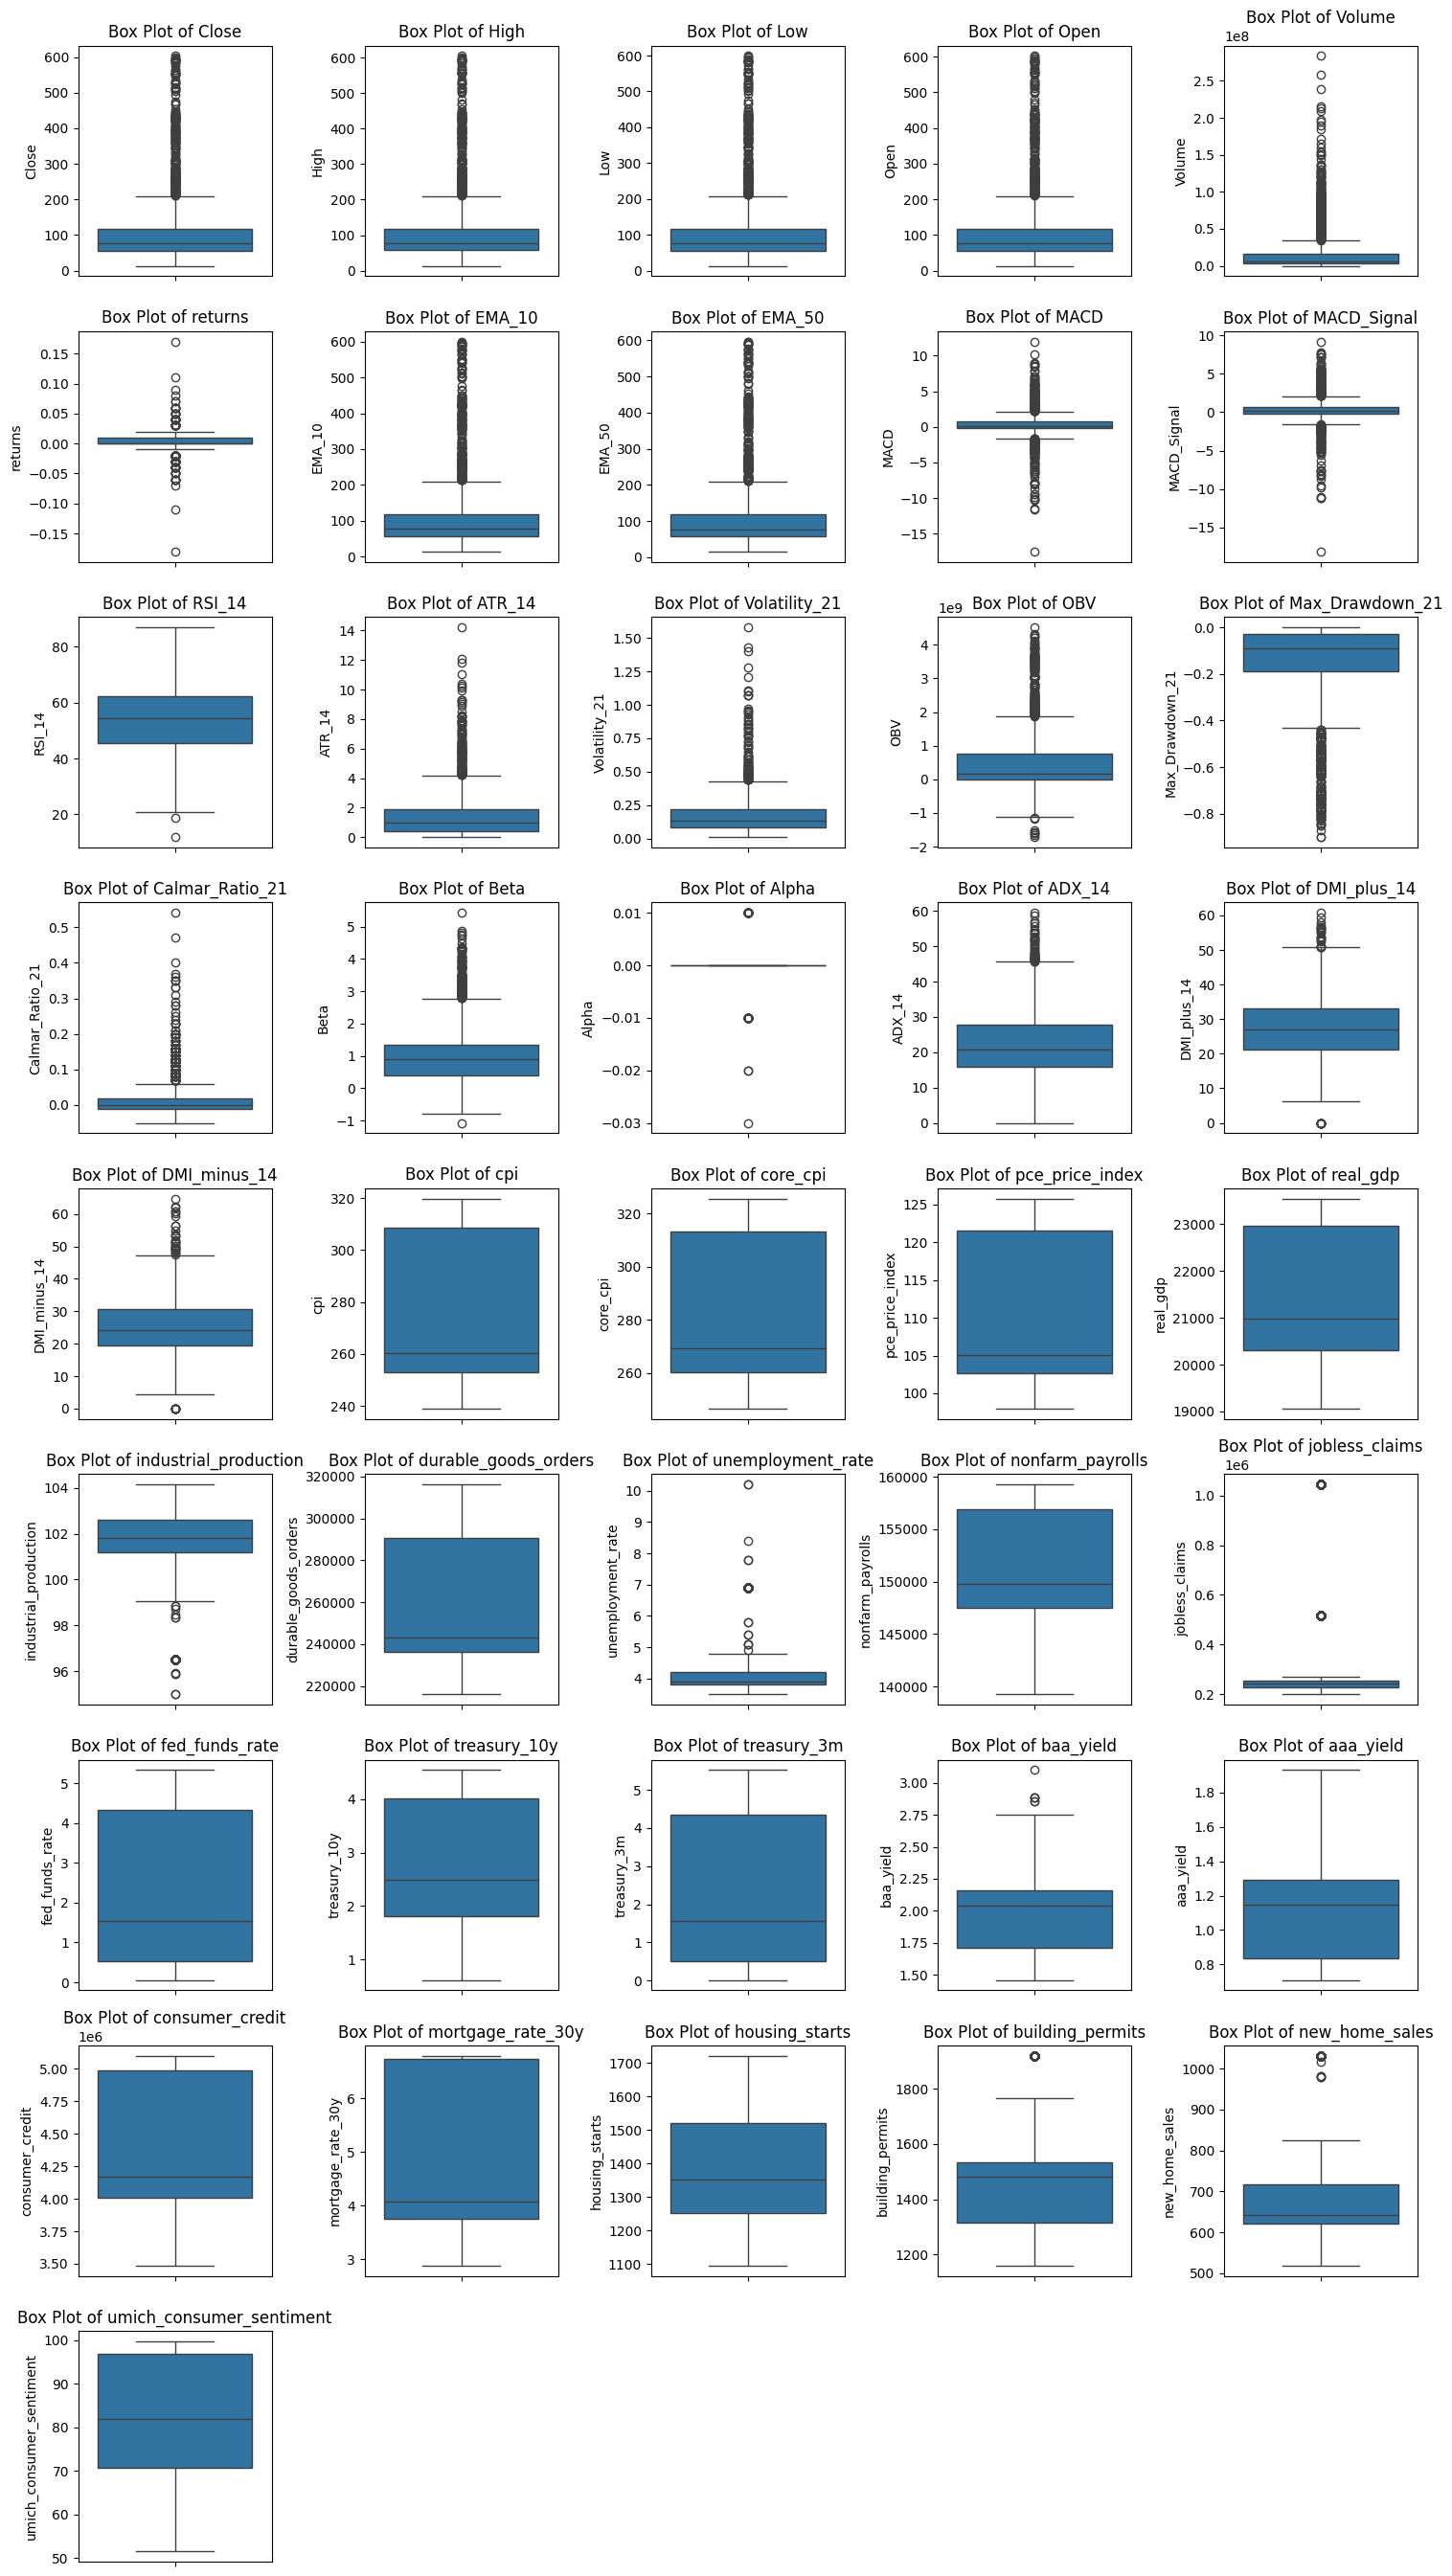

In [79]:
import seaborn as sns
import matplotlib.pyplot as plt

# Sample the data to reduce size (e.g., 10,000 rows)
sampled_df = df.sample(n=2000, random_state=42)

# Check for numerical columns and drop columns with all NaN values
numerical_cols = sampled_df.select_dtypes(include=['float64', 'int64']).columns
numerical_cols = [col for col in numerical_cols if sampled_df[col].notna().any()]

# Dynamically calculate grid size
num_cols = len(numerical_cols)
rows = (num_cols // 5) + (num_cols % 5 > 0)

# Plot box plots
plt.figure(figsize=(15, rows * 3))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(rows, 5, i)
    sns.boxplot(y=sampled_df[col])
    plt.title(f'Box Plot of {col}')
    plt.tight_layout()

plt.show()

- Winsorization

In [80]:
from scipy.stats.mstats import winsorize

def winsorize_column(series, lower=0.01, upper=0.01):
    return pd.Series(winsorize(series, limits=(lower, upper)), index=series.index)

# Example: Apply to returns
df['returns_winsorized'] = df.groupby('Ticker')['returns'].transform(
    lambda x: winsorize_column(x, lower=0.01, upper=0.01)
)


- Z-Score filter

In [81]:
# from scipy.stats import zscore

# # Compute z-score of the winsorized returns
# df['zscore'] = df.groupby('Ticker')['returns'].transform(zscore)

# # Filter out rows where z-score exceeds threshold
# df_cleaned = df[np.abs(df['zscore']) <= 3].copy()

# # Optional: Drop z-score column after filtering
# df_cleaned.drop(columns='zscore', inplace=True)


In [91]:
# Saving the cleaned data to a new CSV
df_cleaned.to_csv("5-cleaned_etf_data.csv", index=True)


In [95]:
df.columns


Index(['Ticker', 'Close', 'High', 'Low', 'Open', 'Volume', 'returns', 'EMA_10',
       'EMA_50', 'MACD', 'MACD_Signal', 'RSI_14', 'ATR_14', 'Volatility_21',
       'OBV', 'Max_Drawdown_21', 'Calmar_Ratio_21', 'Beta', 'Alpha', 'ADX_14',
       'DMI_plus_14', 'DMI_minus_14', 'cpi', 'core_cpi', 'pce_price_index',
       'real_gdp', 'industrial_production', 'durable_goods_orders',
       'unemployment_rate', 'nonfarm_payrolls', 'jobless_claims',
       'fed_funds_rate', 'treasury_10y', 'treasury_3m', 'baa_yield',
       'aaa_yield', 'consumer_credit', 'mortgage_rate_30y', 'housing_starts',
       'building_permits', 'new_home_sales', 'umich_consumer_sentiment',
       'returns_winsorized'],
      dtype='object')

### Feature Selection Framework

In [2]:
import pandas as pd
data =("/Users/imperator/Documents/STUDIES/UNIVERSITY OF GHANA/RESEARCH WORK/CORCHIL KELLY KWAME/PORTFOLIO OPTIMIZATION/PROJECT CODE/Dimensionality-Reduction-PortfolioOptimization/EDA/ETFs_datasets/Final_csv/5-cleaned_etf_data.csv")  # Replace with your file
df = pd.read_csv(data)
df.columns

Index(['Date', 'Ticker', 'Close', 'High', 'Low', 'Open', 'Volume', 'returns',
       'EMA_10', 'EMA_50', 'MACD', 'MACD_Signal', 'RSI_14', 'ATR_14',
       'Volatility_21', 'OBV', 'Max_Drawdown_21', 'Calmar_Ratio_21', 'Beta',
       'Alpha', 'ADX_14', 'DMI_plus_14', 'DMI_minus_14', 'cpi', 'core_cpi',
       'pce_price_index', 'real_gdp', 'industrial_production',
       'durable_goods_orders', 'unemployment_rate', 'nonfarm_payrolls',
       'jobless_claims', 'fed_funds_rate', 'treasury_10y', 'treasury_3m',
       'baa_yield', 'aaa_yield', 'consumer_credit', 'mortgage_rate_30y',
       'housing_starts', 'building_permits', 'new_home_sales',
       'umich_consumer_sentiment', 'returns_winsorized'],
      dtype='object')

/Users/imperator/Documents/STUDIES/UNIVERSITY OF GHANA/RESEARCH WORK/CORCHIL KELLY KWAME/PORTFOLIO OPTIMIZATION/PROJECT CODE/Dimensionality-Reduction-PortfolioOptimization/.venv/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.125e-03, tolerance: 2.723e-04
  model = cd_fast.enet_coordinate_descent_gram(
/Users/imperator/Documents/STUDIES/UNIVERSITY OF GHANA/RESEARCH WORK/CORCHIL KELLY KWAME/PORTFOLIO OPTIMIZATION/PROJECT CODE/Dimensionality-Reduction-PortfolioOptimization/.venv/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.419e-02, tolerance: 2.723e-04
  mode

<Figure size 1200x1000 with 0 Axes>

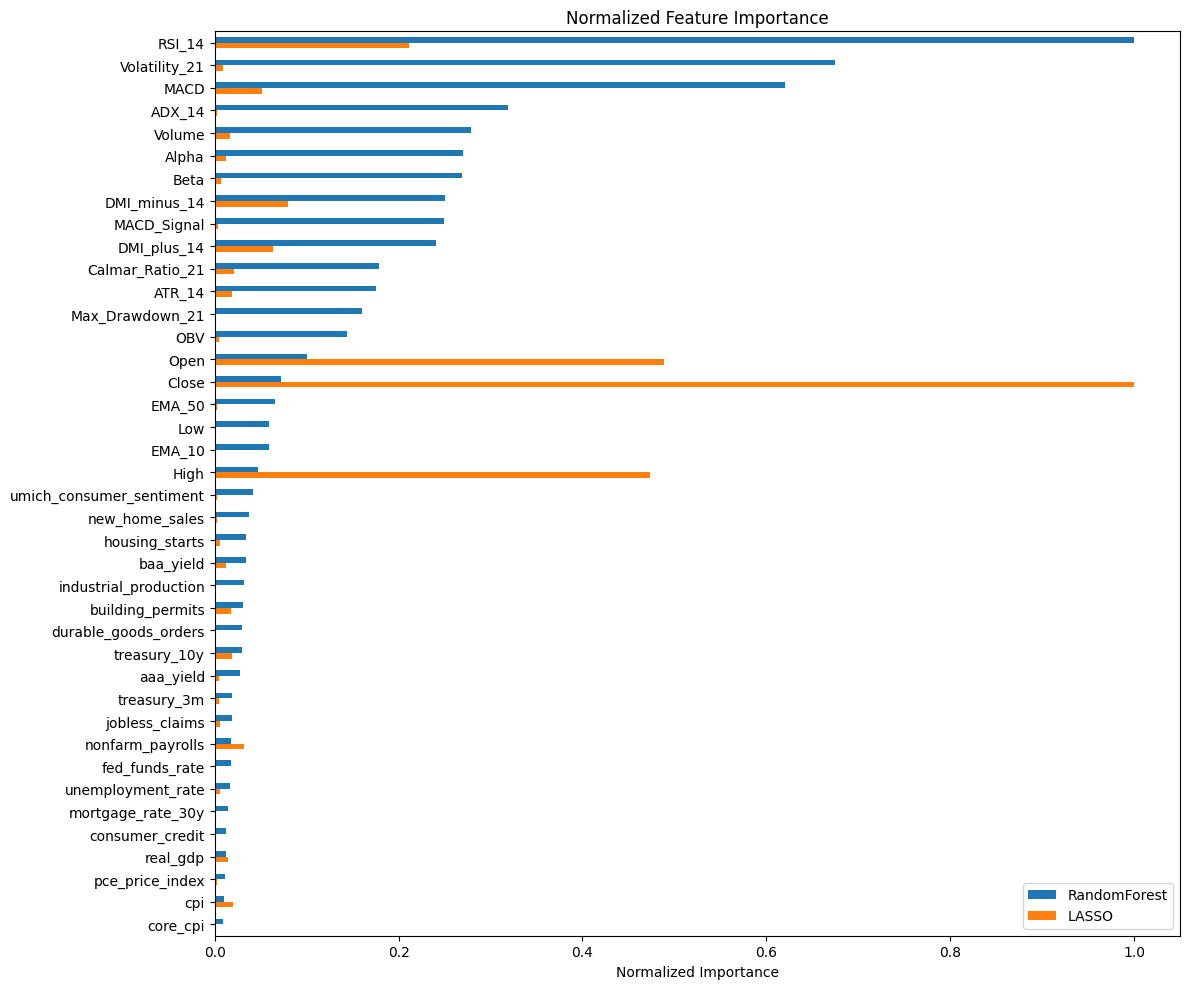

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LassoCV
from sklearn.inspection import permutation_importance
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# # === 1. Load Data ===
df = pd.read_csv("/Users/imperator/Documents/STUDIES/UNIVERSITY OF GHANA/RESEARCH WORK/CORCHIL KELLY KWAME/PORTFOLIO OPTIMIZATION/PROJECT CODE/Dimensionality-Reduction-PortfolioOptimization/EDA/ETFs_datasets/Final_csv/5-cleaned_etf_data.csv")  # Replace with your file
target = 'returns'  # Adjust if needed

# === 2. Select Features (customize this list) ===
# features = ['EMA_10',
#        'EMA_50', 'MACD', 'MACD_Signal', 'RSI_14', 'ATR_14', 'Volatility_21',
#        'OBV', 'Max_Drawdown_21', 'Calmar_Ratio_21', 'Beta', 'Alpha', 'ADX_14',
#        'DMI_plus_14', 'DMI_minus_14', 'cpi', 'core_cpi', 'pce_price_index',
#        'real_gdp', 'industrial_production', 'durable_goods_orders',
#        'unemployment_rate', 'nonfarm_payrolls', 'jobless_claims',
#        'fed_funds_rate', 'treasury_10y', 'treasury_3m', 'baa_yield',
#        'aaa_yield', 'consumer_credit', 'mortgage_rate_30y', 'housing_starts',
#        'building_permits', 'new_home_sales', 'umich_consumer_sentiment',]
features = ['Close', 'High', 'Low', 'Open', 'Volume',
       'EMA_10', 'EMA_50', 'MACD', 'MACD_Signal', 'RSI_14', 'ATR_14',
       'Volatility_21', 'OBV', 'Max_Drawdown_21', 'Calmar_Ratio_21', 'Beta',
       'Alpha', 'ADX_14', 'DMI_plus_14', 'DMI_minus_14', 'cpi', 'core_cpi',
       'pce_price_index', 'real_gdp', 'industrial_production',
       'durable_goods_orders', 'unemployment_rate', 'nonfarm_payrolls',
       'jobless_claims', 'fed_funds_rate', 'treasury_10y', 'treasury_3m',
       'baa_yield', 'aaa_yield', 'consumer_credit', 'mortgage_rate_30y',
       'housing_starts', 'building_permits', 'new_home_sales',
       'umich_consumer_sentiment']

X = df[features]
y = df[target]

# === 3. Train/Test Split ===
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# === 4. Random Forest Importance ===
rf = RandomForestRegressor(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)
rf_importance = pd.Series(rf.feature_importances_, index=features).sort_values(ascending=False)

# === 5. LASSO Regression Importance ===
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

lasso = LassoCV(cv=5, random_state=42).fit(X_scaled, y)
lasso_importance = pd.Series(np.abs(lasso.coef_), index=features).sort_values(ascending=False)

#=== 6. Permutation Importance (Optional, Slow) ===
perm_result = permutation_importance(rf, X_test, y_test, n_repeats=10, random_state=42)
perm_importance = pd.Series(perm_result.importances_mean, index=features).sort_values(ascending=False)

# === 7. Combine Importances ===
importance_df = pd.DataFrame({
    'RandomForest': rf_importance,
    'LASSO': lasso_importance
    # 'Permutation': perm_importance  # Uncomment if using permutation
})

# === 8. Normalize for comparison ===
importance_df_norm = importance_df / importance_df.max()
importance_df_norm = importance_df_norm.sort_values(by='RandomForest', ascending=False)

# === 9. Plot Importances ===
plt.figure(figsize=(12, 10))
importance_df_norm.plot(kind='barh', figsize=(12, 10), title="Normalized Feature Importance")
plt.gca().invert_yaxis()
plt.xlabel("Normalized Importance")
plt.tight_layout()
plt.show()

# === 10. Display Top N Features ===
#top_n = 20
#print("Top Features:\n", importance_df.sort_values(by="RandomForest", ascending=False).head(top_n).round(4))

# === 11. Export (optional) ===
# importance_df.to_csv("feature_importance_results.csv")


📘 Final Feature Selection Justification (Based on LASSO)
Feature Selection Justification Using LASSO: Empirical Rigor with Financial Interpretation
In designing a portfolio optimization system that directly maximizes the Sharpe ratio, selecting a parsimonious and high-impact set of input features is critical. After evaluating feature importance using both LASSO and Random Forest, the final feature set was constructed based on the LASSO model due to its advantages in producing sparse, interpretable, and robust models.

LASSO, or Least Absolute Shrinkage and Selection Operator, is a regularized regression method that applies an L1 penalty to coefficients, shrinking those with little predictive contribution to zero. This makes it ideal for financial datasets that often suffer from multicollinearity and redundant information. By design, LASSO facilitates model interpretability and prevents overfitting — a key requirement when forecasting returns and making allocation decisions based on historical data.

✅ 1. OHLCV Features: Close, Open, High
The core price-based features retained — Close, Open, and High — are foundational in asset pricing and serve as essential inputs for both direct return modeling and technical indicator derivation.

Close reflects investor consensus and serves as the basis for return calculations.

Open incorporates overnight sentiment, market gaps, and pre-market news effects.

High provides insight into maximum intra-period risk, useful for assessing potential drawdowns.

These features are universally relevant in both academic literature and practitioner models and form the base layer of any technical signal extraction process.

✅ 2. Technical Indicators: Momentum, Trend, and Volatility Awareness
LASSO selected a concise suite of technical indicators that capture various dimensions of price behavior, including momentum, volatility, and trend strength:

EMA_10: Short-term trend-following measure that responds quickly to market shifts.

RSI_14: Momentum oscillator that identifies overbought/oversold conditions, helping flag potential reversals.

MACD: Measures the difference between short- and long-term EMAs, capturing momentum shifts.

ADX_14, DMI_plus_14, DMI_minus_14: Quantify trend strength and direction, which are key inputs for dynamically adjusting portfolio weights in trending vs. range-bound markets.

These indicators complement OHLCV data by providing filtered signals that help deep learning models recognize market regimes and predict risk-adjusted returns.

✅ 3. Macroeconomic Indicators: Anchoring the Model in Structural Economic Context
Contrary to common assumptions, several macroeconomic features ranked surprisingly high in LASSO importance, indicating their relevance even in a monthly ETF return forecasting context. The following four macro variables were retained based on both their LASSO scores and their economic relevance:

• Treasury 10-Year Yield (treasury_10y)
This long-term rate serves as a benchmark for discounting future cash flows and reflects investor expectations for economic growth, inflation, and monetary policy. It is a key risk-free rate proxy that influences asset class valuations across equities, bonds, and real assets.

• Nonfarm Payrolls (nonfarm_payrolls)
This is one of the most closely watched labor market indicators, providing insight into economic momentum and employment health. Strong payroll data typically supports risk-on behavior, driving flows into equity ETFs, while weak readings may trigger risk-off moves.

• Consumer Price Index (CPI) (cpi)
As a leading indicator of inflation, CPI plays a vital role in shaping interest rate expectations. Rising CPI often leads to tightening monetary policy, affecting valuations and risk premiums across ETF sectors. Its inclusion improves the model’s sensitivity to inflation-driven regime changes.

• BAA Corporate Bond Yield (baa_yield)
This yield captures the credit spread on medium-grade corporate bonds, acting as a proxy for perceived credit risk and market stress. Rising BAA yields signal deteriorating credit conditions, which can affect equity markets, particularly high-beta or leveraged ETFs.

Together, these macro variables provide the model with top-down context, helping it understand structural drivers that influence ETF returns beyond just technical behavior.

❌ Dropped Features: Empirical and Theoretical Justification
LASSO dropped several macro and technical variables due to one or more of the following reasons:

Low signal strength: e.g., Real GDP, durable goods orders, building permits — highly lagged and weakly correlated with monthly ETF returns.

High collinearity: e.g., Volume, Low, or MACD_Signal — whose predictive value was already captured by other retained features.

Low variance or data staleness: e.g., Consumer credit, unemployment claims — provide little month-to-month change or signal saturation.

Removing these features reduced dimensionality, improved training efficiency, and minimized noise, while preserving predictive power.

✅ Conclusion
The final feature set, selected via LASSO and validated with financial logic, combines:

Foundational price data (Close, Open, High)

Well-established technical indicators for trend, momentum, and volatility

High-impact macroeconomic anchors reflecting rates, inflation, employment, and credit risk

This configuration is designed to support deep learning models (MLP, LSTM, CNN-LSTM, and Transformer) in learning return-generating processes that are not only data-efficient but also grounded in financial reality.

By aligning statistical evidence with financial theory, this feature selection strategy strengthens the overall credibility, generalization, and Sharpe-ratio performance of the proposed portfolio optimization framework.



In [103]:
import pandas as pd

# Load your cleaned ETF dataset
df = pd.read_csv("/Users/imperator/Documents/STUDIES/UNIVERSITY OF GHANA/RESEARCH WORK/CORCHIL KELLY KWAME/PORTFOLIO OPTIMIZATION/PROJECT CODE/Dimensionality-Reduction-PortfolioOptimization/EDA/ETFs_datasets/Final_csv/5-cleaned_etf_data.csv")

# Define the selected feature list based on LASSO + domain knowledge
selected_features = [
    'Ticker','Date','Close', 'Open', 'High',                       # OHLCV
    'EMA_10', 'RSI_14', 'MACD',                    # Technicals
    'ADX_14', 'DMI_plus_14', 'DMI_minus_14',
    'treasury_10y', 'nonfarm_payrolls', 'cpi',     # Macros
    'baa_yield',
    'returns'  # Use 'returns_winsorized' if needed
]

# convert 'Date' to datetime if not already
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Filter the DataFrame
df_selected = df[selected_features].copy()

# Drop rows with missing values (optional but recommended)
df_selected.dropna(inplace=True)

# Save the reduced dataset to a new CSV file
df_selected.to_csv("/Users/imperator/Documents/STUDIES/UNIVERSITY OF GHANA/RESEARCH WORK/CORCHIL KELLY KWAME/PORTFOLIO OPTIMIZATION/PROJECT CODE/Dimensionality-Reduction-PortfolioOptimization/EDA/ETFs_datasets/Final_csv/5b-selected_features_dataset.csv", index=False)


## Splitting the Data into Test and Training Datasets & Normalizing x Standardizing


In [107]:
import pandas as pd
import numpy as np
import os
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# === Step 1: Load Dataset ===
file_path = '/Users/imperator/Documents/STUDIES/UNIVERSITY OF GHANA/RESEARCH WORK/CORCHIL KELLY KWAME/PORTFOLIO OPTIMIZATION/PROJECT CODE/Dimensionality-Reduction-PortfolioOptimization/EDA/ETFs_datasets/Final_csv/5b-selected_features_dataset.csv'
data = pd.read_csv(file_path)

# === Step 2: Clean columns and parse date ===
data.columns = data.columns.str.strip()
data['Date'] = pd.to_datetime(data['Date'].astype(str).str.strip(), errors='coerce')
data = data.dropna(subset=['Date'])  # Remove bad dates

# === Step 3: Sort by Date ===
data = data.sort_values(by='Date')

# === Step 4: Define features and target ===
features = data[[
    'Close', 'Open', 'High',                       # OHLCV
    'EMA_10', 'RSI_14', 'MACD',                    # Technicals
    'ADX_14', 'DMI_plus_14', 'DMI_minus_14',
    'treasury_10y', 'nonfarm_payrolls', 'cpi',     # Macros
    'baa_yield'
]]
target = data['returns']
metadata = data[['Ticker', 'Date']]

# === Step 5: Chronological Split (70% Train) ===
cutoff_date = data['Date'].quantile(0.7)
train_mask = data['Date'] < cutoff_date
test_mask = data['Date'] >= cutoff_date

X_train = features[train_mask]
X_test = features[test_mask]
y_train = target[train_mask]
y_test = target[test_mask]
metadata_train = metadata[train_mask]
metadata_test = metadata[test_mask]

# === Step 6: Standardize (mean=0, std=1) ===
scaler_standard = StandardScaler()
X_train_std = scaler_standard.fit_transform(X_train)
X_test_std = scaler_standard.transform(X_test)

# Convert to DataFrames
X_train_std_df = pd.DataFrame(X_train_std, columns=features.columns, index=X_train.index)
X_test_std_df = pd.DataFrame(X_test_std, columns=features.columns, index=X_test.index)

# === Step 7: Normalize (0–1 scale) AFTER standardization ===
scaler_minmax = MinMaxScaler()
X_train_norm = scaler_minmax.fit_transform(X_train_std_df)
X_test_norm = scaler_minmax.transform(X_test_std_df)

# Convert to DataFrames
X_train_norm_df = pd.DataFrame(X_train_norm, columns=features.columns, index=X_train.index)
X_test_norm_df = pd.DataFrame(X_test_norm, columns=features.columns, index=X_test.index)

# === Step 8: Save Paths ===
base_path = "/Users/imperator/Documents/STUDIES/UNIVERSITY OF GHANA/RESEARCH WORK/CORCHIL KELLY KWAME/PORTFOLIO OPTIMIZATION/PROJECT CODE/Dimensionality-Reduction-PortfolioOptimization/EDA/ETFs_datasets/Model Data/Pre-Dim Reduction"
train_path = os.path.join(base_path, "Training_Dataset")
test_path = os.path.join(base_path, "Test_Dataset")

os.makedirs(train_path, exist_ok=True)
os.makedirs(test_path, exist_ok=True)

# === Step 9: Save to CSV ===

# Standardized only
X_train_std_df.to_csv(os.path.join(train_path, "X_train_standardized.csv"), index=False)
X_test_std_df.to_csv(os.path.join(test_path, "X_test_standardized.csv"), index=False)

# Standardized + Normalized
X_train_norm_df.to_csv(os.path.join(train_path, "X_train_standardized_normalized.csv"), index=False)
X_test_norm_df.to_csv(os.path.join(test_path, "X_test_standardized_normalized.csv"), index=False)

# Targets
y_train.to_csv(os.path.join(train_path, "y_train.csv"), index=False)
y_test.to_csv(os.path.join(test_path, "y_test.csv"), index=False)

# Metadata
metadata_train.to_csv(os.path.join(train_path, "metadata_train.csv"), index=False)
metadata_test.to_csv(os.path.join(test_path, "metadata_test.csv"), index=False)

# === Step 10: Done ===
print("✅ Split, standardization, and normalization complete.")
print(f"Train cutoff date: {cutoff_date.strftime('%Y-%m-%d')}")
print(f"Train samples: {X_train.shape[0]}, Test samples: {X_test.shape[0]}")


✅ Split, standardization, and normalization complete.
Train cutoff date: 2022-07-05
Train samples: 13631, Test samples: 5845


- Visualization


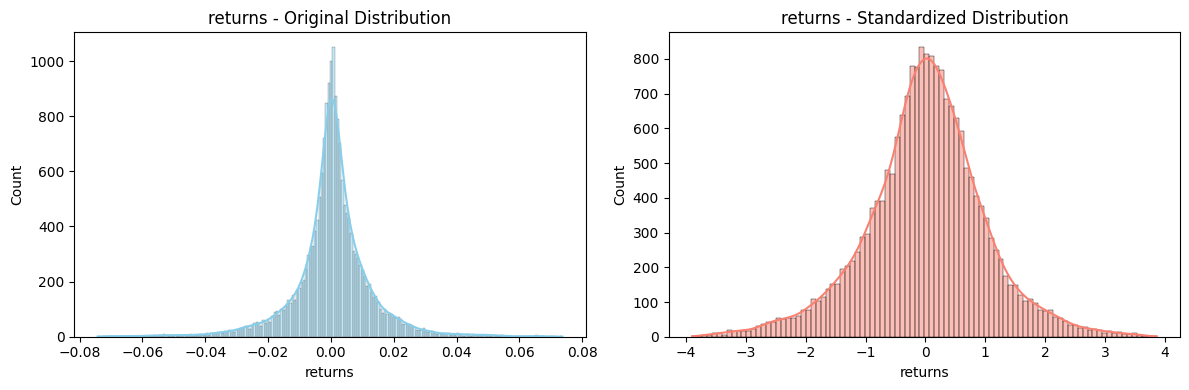

<Figure size 640x480 with 0 Axes>

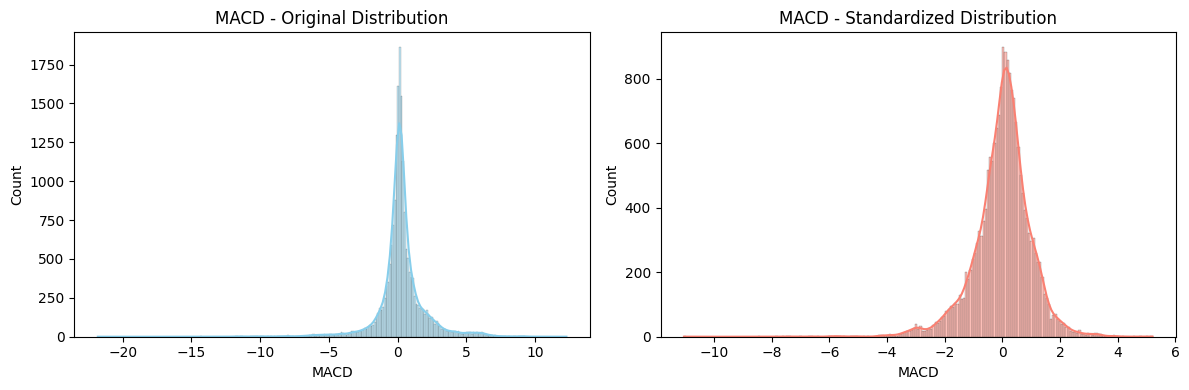

<Figure size 640x480 with 0 Axes>

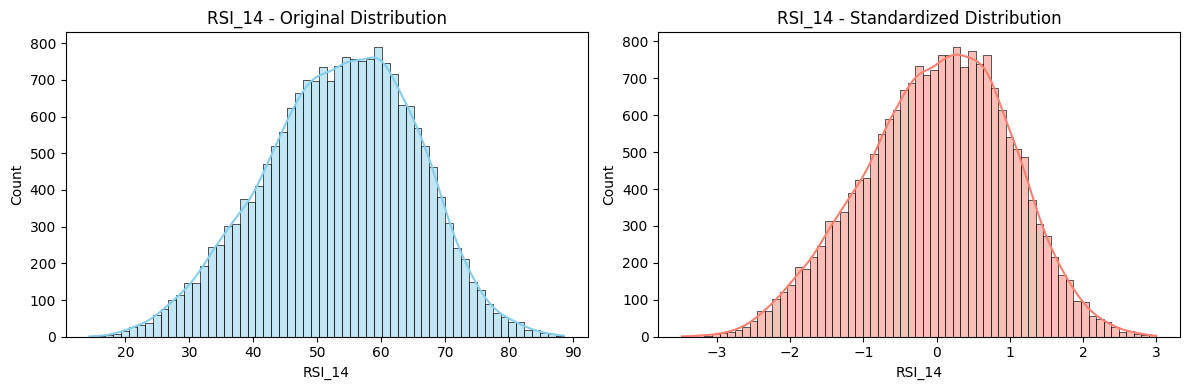

<Figure size 640x480 with 0 Axes>

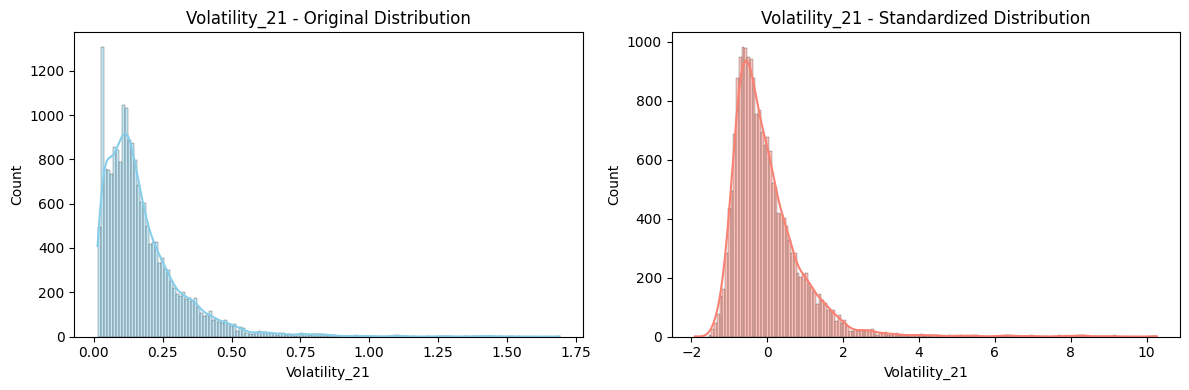

<Figure size 640x480 with 0 Axes>

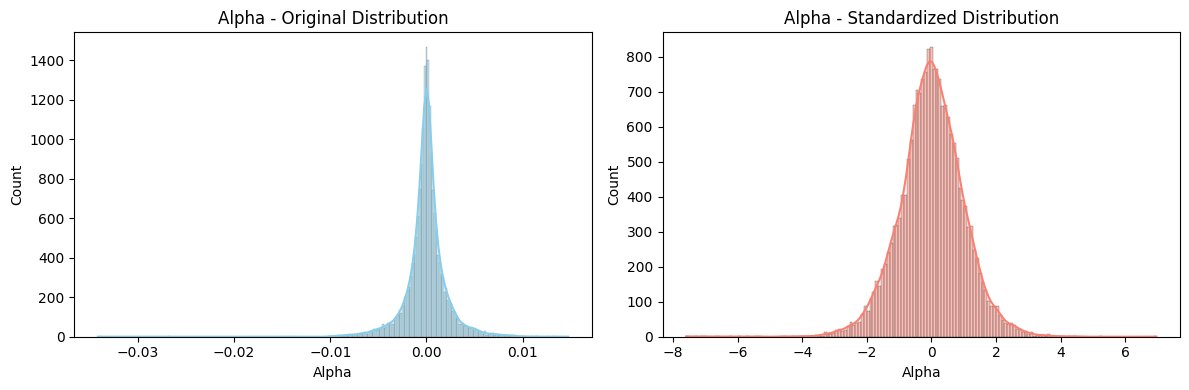

<Figure size 640x480 with 0 Axes>

In [110]:
import matplotlib.pyplot as plt

for feature in features_to_plot:
    plt.figure(figsize=(12, 4))

    # Original
    plt.subplot(1, 2, 1)
    sns.histplot(df_original[feature].dropna(), kde=True, color='skyblue')
    plt.title(f'{feature} - Original Distribution')

    # Standardized
    plt.subplot(1, 2, 2)
    sns.histplot(df_scaled[feature].dropna(), kde=True, color='salmon')
    plt.title(f'{feature} - Standardized Distribution')

    plt.tight_layout()
    plt.show()
    # Save the plot as PNG or PDF
    plt.savefig("returns_distribution_comparison.png", dpi=300)
        # Optional: also save as PDF
    plt.savefig("returns_distribution_comparison.pdf")



In [115]:
# give me code to standardize a dataset
import pandas as pd
from sklearn.preprocessing import StandardScaler
# Load your dataset
df = pd.read_csv('/Users/imperator/Documents/STUDIES/UNIVERSITY OF GHANA/RESEARCH WORK/CORCHIL KELLY KWAME/PORTFOLIO OPTIMIZATION/PROJECT CODE/Dimensionality-Reduction-PortfolioOptimization/EDA/ETFs_datasets/Final_csv/5aa-cleaned_etf_data copy.csv')  # Replace with your actual dataset path
# Select numeric columns for standardization
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
# Initialize the StandardScaler
scaler = StandardScaler()
# Fit and transform the numeric columns
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])
# Save the standardized dataset
df.to_csv('5e-standardized_dataset.csv', index=False)  # Replace with desired output path
# Load the standardized dataset
standardized_df = pd.read_csv('5e-standardized_dataset.csv')
# Display the first few rows of the standardized dataset
print(standardized_df.head())
# # Save the standardized dataset
# standardized_df.to_csv('standardized_dataset.csv', index=False)  # Replace with desired output path
# # Load the standardized dataset
# standardized_df = pd.read_csv('standardized_dataset.csv')

         Date Ticker     Close      High       Low      Open    Volume  \
0  24/08/2015    AGG -0.268343 -0.268342 -0.264399 -0.266301 -0.407537   
1  25/08/2015    AGG -0.270306 -0.273149 -0.267741 -0.268566 -0.453527   
2  26/08/2015    AGG -0.274156 -0.275328 -0.269639 -0.273248 -0.456071   
3  27/08/2015    AGG -0.273023 -0.276906 -0.269259 -0.274229 -0.454517   
4  28/08/2015    AGG -0.273778 -0.275629 -0.269259 -0.271285 -0.429877   

    returns    EMA_10    EMA_50  ...    ATR_14  Volatility_21       OBV  \
0 -0.061385 -0.269556 -0.269847  ... -0.749124      -0.976850 -0.529973   
1 -0.217329 -0.269492 -0.269675  ... -0.741172      -0.968694 -0.534457   
2 -0.394996 -0.270142 -0.269663  ... -0.734113      -0.941595 -0.538858   
3  0.073611 -0.270467 -0.269606  ... -0.737813      -0.940449 -0.534406   
4 -0.104832 -0.270871 -0.269581  ... -0.735624      -0.939236 -0.539667   

   Max_Drawdown_21  Calmar_Ratio_21      Beta    ADX_14  DMI_plus_14  \
0         0.809491         1.003

In [112]:
df.head()

,Date,Ticker,returns,MACD,RSI_14,Volatility_21,new_home_sales,umich_consumer_sentiment
0,24/08/2015,ARKK,-2.297825,-0.379413,-2.661988,0.359441,-0.189394,0.225562
1,24/08/2015,GLD,-0.452339,0.124813,1.004128,-0.392267,-0.189394,0.225562
2,24/08/2015,AGG,-0.061710,-0.052427,0.813631,-0.976838,-0.189394,0.225562
3,24/08/2015,USO,-4.373000,-4.862114,-3.193402,1.039059,-0.189394,0.225562
4,24/08/2015,HYG,-0.668918,-0.350050,-2.863756,-0.812874,-0.189394,0.225562


In [113]:
import pandas as pd

# Load your CSV
df = pd.read_csv('/Users/imperator/Documents/STUDIES/UNIVERSITY OF GHANA/RESEARCH WORK/CORCHIL KELLY KWAME/PORTFOLIO OPTIMIZATION/PROJECT CODE/Dimensionality-Reduction-PortfolioOptimization/EDA/ETFs_datasets/Final_csv/5a-cleaned_etf_data copy.csv')

# Ensure 'Date' is datetime and sort (if present)
if 'Date' in df.columns:
    df['Date'] = pd.to_datetime(df['Date'])
    df = df.sort_values(['Ticker', 'Date'])

# Calculate cumulative returns per Ticker
df['cumulative_returns'] = df.groupby('Ticker')['returns'].transform(lambda x: (1 + x).cumprod())

# # Calculate rolling peak per Ticker
# df['peak'] = df.groupby('Ticker')['cumulative_returns'].transform('cummax')

# # Calculate drawdown per Ticker
# df['drawdown'] = (df['cumulative_returns'] - df['peak']) / df['peak']

# Save to CSV
df.to_csv('5aa-cleaned_etf_data copy.csv', index=False)

print(df.head())


         Date Ticker      Close       High        Low       Open   Volume  \
2  2015-08-24    AGG  84.675560  85.154036  84.559797  84.891647  5440200   
12 2015-08-25    AGG  84.474876  84.660093  84.220200  84.660093  4070000   
13 2015-08-26    AGG  84.081253  84.436259  84.027231  84.181583  3994200   
24 2015-08-27    AGG  84.197029  84.274202  84.065834  84.081267  4040500   
29 2015-08-28    AGG  84.119843  84.405389  84.065821  84.382232  4774600   

     returns     EMA_10     EMA_50  ...    ATR_14  Volatility_21      OBV  \
2  -0.000364  84.438807  84.032837  ...  0.269635       0.030312  4013400   
12 -0.002370  84.445365  84.050172  ...  0.282901       0.031521   -56600   
13 -0.004660  84.379163  84.051391  ...  0.294669       0.035540 -4050800   
24  0.001377  84.346048  84.057102  ...  0.288504       0.035708   -10300   
29 -0.000917  84.304919  84.059562  ...  0.292152       0.035886 -4784900   

    Max_Drawdown_21  Calmar_Ratio_21      Beta     ADX_14  DMI_plus_14  \


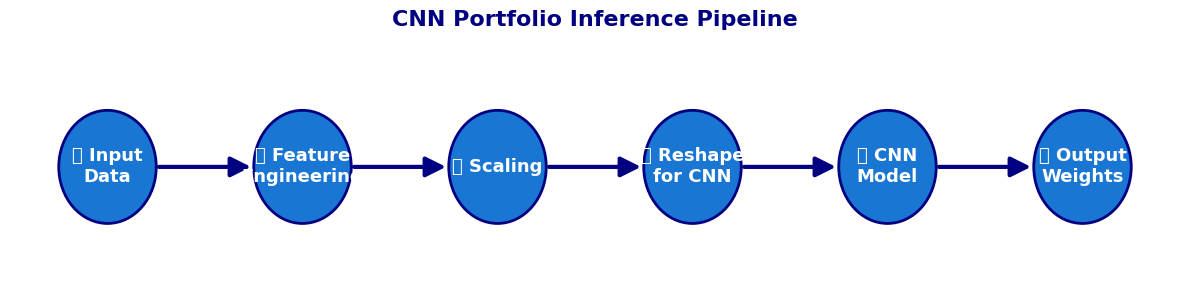

In [119]:
import matplotlib.pyplot as plt
from matplotlib.patches import FancyArrowPatch, Circle

fig, ax = plt.subplots(figsize=(12, 3))
ax.axis('off')

# Define step positions and labels with icons
steps = [
    (0, "🗂️ Input\nData"),
    (1, "🧮 Feature\nEngineering"),
    (2, "📏 Scaling"),
    (3, "🔄 Reshape\nfor CNN"),
    (4, "🤖 CNN\nModel"),
    (5, "📊 Output\nWeights")
]
y = 0

# Draw circles and labels
for x, label in steps:
    circle = Circle((x*2, y), 0.5, color='#1976D2', ec='navy', lw=2, zorder=2)
    ax.add_patch(circle)
    ax.text(x*2, y, label, ha='center', va='center', fontsize=13, color='white', fontweight='bold', zorder=3)
    # Draw arrows except after the last node
    if x < len(steps)-1:
        ax.add_patch(FancyArrowPatch((x*2+0.5, y), (x*2+1.5, y), arrowstyle='-|>', mutation_scale=30, color='navy', lw=3, zorder=1))

# Set plot limits for a clean look
ax.set_xlim(-1, steps[-1][0]*2 + 1)
ax.set_ylim(-1, 1)

plt.title("CNN Portfolio Inference Pipeline", fontsize=16, fontweight='bold', color='navy', pad=20)
plt.tight_layout()
plt.show()


In [ ]:
data = pd.read_csv('/Users/imperator/Documents/STUDIES/UNIVERSITY OF GHANA/RESEARCH WORK/CORCHIL KELLY KWAME/PORTFOLIO OPTIMIZATION/PROJECT CODE/Dimensionality-Reduction-PortfolioOptimization/EDA/ETFs_datasets/Final_csv/5-cleaned_etf_data.csv')


In [ ]:
assets = ['ARKK', 'AGG', 'GLD', 'HYG', 'SPY', 'USO', 'VNQ', 'VXUS']
features_indicators = ['returns','RSI_14','Volatility_21','MACD','ADX_14','umich_consumer_sentiment','new_home_sales','housing_starts']  


#### Graphiz Visualization for Data Pipeline

In [25]:
from graphviz import Digraph

dot = Digraph(format='png')
dot.attr(rankdir='LR', size='16,8', dpi='300', bgcolor='white')  # Landscape layout

# Colors
lightblue = '#b3d8ff'
blue = '#3399ff'
green = '#4caf50'

# Title with label at top
dot.attr(label='Data Pipeline for Deep Learning Models', labelloc='t', fontsize='20')

# Invisible spacer node for vertical gap below title
dot.node('Spacer', label='', shape='plaintext', height='0.4', width='0')

# Main nodes
dot.node('A', '''
Data Sourcing
(yfinance library, FRED API)
         ''',
         shape='box', style='rounded', fillcolor=lightblue, fontsize='14')

dot.node('B', '''
EDA 
(Multi-Variate Analysis, Feature Eng)
         ''',
         shape='box', style='rounded,filled', fillcolor=lightblue, fontsize='14')

dot.node('C', '''
Dimensionality Reduction
(PCA & Autoencoders)
         ''',
         shape='box', style='rounded,filled', fillcolor=blue, fontcolor='white', fontsize='14')

dot.node('D', '''
Model Training 
(CNN-LSTM, Bi-LSTM etc.)
         ''',
         shape='box', style='rounded,filled', fillcolor=blue, fontcolor='white', fontsize='14')

dot.node('E', '''
Softmax (with Temperature)
Portfolio Weights Output & Sharpe Ratio 
         ''',
         shape='box', style='rounded,filled', fillcolor=green, fontcolor='white', fontsize='14')

# Edges
# Connect spacer invisibly to first node to push nodes downward
dot.edge('Spacer', 'A', style='invis')

dot.edge('A', 'B', color=blue, penwidth='2')
dot.edge('B', 'C', color=blue, penwidth='2')
dot.edge('C', 'D', color=blue, penwidth='2')
dot.edge('D', 'E', color=green, penwidth='2')

# Render and view diagram
dot.render('Data_Pipeline_architecture_landscape', view=True)


'Data_Pipeline_architecture_landscape.png'